# **Final Project**

##**Problem stament :**     

The widespread dissemination of fake news and propaganda presents serious societal risks, including the erosion of public trust, political polarization, manipulation of elections, and the spread of harmful misinformation during crises such as pandemics or conflicts. From an NLP perspective, detecting fake news is fraught with challenges. Linguistically, fake news often mimics the tone and structure of legitimate journalism, making it difficult to distinguish using surface-level features. The absence of reliable and up-to-date labeled datasets, especially across multiple languages and regions, hampers the effectiveness of supervised learning models. Additionally, the dynamic and adversarial nature of misinformation means that malicious actors constantly evolve their language and strategies to bypass detection systems. Cultural context, sarcasm, satire, and implicit bias further complicate automated analysis. Moreover, NLP models risk amplifying biases present in training data, leading to unfair classifications and potential censorship of legitimate content. These challenges underscore the need for cautious, context-aware approaches, as the failure to address them can inadvertently contribute to misinformation, rather than mitigate it.



Use datasets in link : https://drive.google.com/drive/folders/1mrX3vPKhEzxG96OCPpCeh9F8m_QKCM4z?usp=sharing
to complete requirement.

## **About dataset:**

* **True Articles**:

  * **File**: `MisinfoSuperset_TRUE.csv`
  * **Sources**:

    * Reputable media outlets like **Reuters**, **The New York Times**, **The Washington Post**, etc.

* **Fake/Misinformation/Propaganda Articles**:

  * **File**: `MisinfoSuperset_FAKE.csv`
  * **Sources**:

    * **American right-wing extremist websites** (e.g., Redflag Newsdesk, Breitbart, Truth Broadcast Network)
    * **Public dataset** from:

      * Ahmed, H., Traore, I., & Saad, S. (2017): "Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques" *(Springer LNCS 10618)*



## **Requirement**

A team consisting of three members must complete a project that involves applying the methods learned from the beginning of the course up to the present. The team is expected to follow and document the entire machine learning workflow, which includes the following steps:

1. **Data Preprocessing**: Clean and prepare the dataset,etc.

2. **Exploratory Data Analysis (EDA)**: Explore and visualize the data.

3. **Model Building**: Select and build one or more machine learning models suitable for the problem at hand.

4. **Hyperparameter set up**: Set and adjust the model's hyperparameters using appropriate methods to improve performance.

5. **Model Training**: Train the model(s) on the training dataset.

6. **Performance Evaluation**: Evaluate the trained model(s) using appropriate metrics (e.g., accuracy, precision, recall, F1-score, confusion matrix, etc.) and validate their performance on unseen data.

7. **Conclusion**: Summarize the results, discuss the model's strengths and weaknesses, and suggest possible improvements or future work.





# Team Members


| Họ và Tên          | MSSV      |
|--------------------|-----------|
| Võ Thành Đạt       | 22280010  |
| Vũ Ngọc Phương     | 22280072  |
| Phạm Minh Thái     | 22280082  |


# Data Overview

In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 26.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.3 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

import string
import nltk
import textstat
import re
import emoji
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, KFold, PredefinedSplit
from nltk import sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from unicodedata import normalize
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import torch
import random
from datasets import Dataset, DatasetDict
from torch.utils.data import DataLoader
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    DataCollatorWithPadding, get_scheduler
)
from torch.cuda.amp import autocast, GradScaler
from tqdm import tqdm
from torch.optim import AdamW # Added import AdamW

In [ ]:
TRUE_DATASET_PATH = "/kaggle/input/dataset/DataSet_Misinfo_TRUE.csv"
FAKE_DATASET_PATH = "/kaggle/input/dataset/DataSet_Misinfo_FAKE.csv"
true_df = pd.read_csv(TRUE_DATASET_PATH)
fake_df = pd.read_csv(FAKE_DATASET_PATH)

In [ ]:
def check_df(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" HEAD ".center(70,'-'))
    print(dataframe.head())
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(' MISSING VALUES '.center(70,'-'))
    print(dataframe.isnull().sum())
    print(' DUPLICATED VALUES '.center(70,'-'))
    print(dataframe.duplicated().sum())

check_df(true_df)

------------------------------- SHAPE --------------------------------
Rows: 34975
Columns: 2
-------------------------------- HEAD --------------------------------
   Unnamed: 0                                               text
0           0  The head of a conservative Republican faction ...
1           1  Transgender people will be allowed for the fir...
2           2  The special counsel investigation of links bet...
3           3  Trump campaign adviser George Papadopoulos tol...
4           4  President Donald Trump called on the U.S. Post...
------------------------------- TYPES --------------------------------
Unnamed: 0     int64
text          object
dtype: object
--------------------------- MISSING VALUES ---------------------------
Unnamed: 0     0
text          29
dtype: int64
------------------------- DUPLICATED VALUES --------------------------
0


In [ ]:
check_df(fake_df)

------------------------------- SHAPE --------------------------------
Rows: 43642
Columns: 2
-------------------------------- HEAD --------------------------------
   Unnamed: 0                                               text
0           0  Donald Trump just couldn t wish all Americans ...
1           1  House Intelligence Committee Chairman Devin Nu...
2           2  On Friday, it was revealed that former Milwauk...
3           3  On Christmas day, Donald Trump announced that ...
4           4  Pope Francis used his annual Christmas Day mes...
------------------------------- TYPES --------------------------------
Unnamed: 0     int64
text          object
dtype: object
--------------------------- MISSING VALUES ---------------------------
Unnamed: 0    0
text          0
dtype: int64
------------------------- DUPLICATED VALUES --------------------------
0


In [ ]:
df = pd.concat([true_df, fake_df], ignore_index=True)
df = df.drop(columns=['Unnamed: 0'])
check_df(df)

------------------------------- SHAPE --------------------------------
Rows: 78617
Columns: 1
-------------------------------- HEAD --------------------------------
                                                text
0  The head of a conservative Republican faction ...
1  Transgender people will be allowed for the fir...
2  The special counsel investigation of links bet...
3  Trump campaign adviser George Papadopoulos tol...
4  President Donald Trump called on the U.S. Post...
------------------------------- TYPES --------------------------------
text    object
dtype: object
--------------------------- MISSING VALUES ---------------------------
text    29
dtype: int64
------------------------- DUPLICATED VALUES --------------------------
10012


**Nhận xét nhanh:**

- Bộ dữ liệu bị tách làm 2 file và chưa có biến thể hiện label (True/Fake). Như vậy, ta sẽ phải tạo thêm biến mục tiêu thể hiện label và hợp 2 bộ dữ liệu lại thành 1 bộ lớn.

- Biến `Unnamed: 0` chỉ là biến Index, không đem lại thông tin hữu ích cho bài toán nên ta sẽ loại bỏ.

- Bộ dữ liệu True bị khuyết 29 giá trị ở biến `text` - đây cũng là biến duy nhất của bộ dữ liệu và ở dạng object (string) không thể fill nên ta sẽ loại bỏ 29 quan trắc này.

- Sau khi hợp 2 bộ dữ liệu và bỏ cột `Unnamed: 0`, ta thấy có 10,012 giá trị trùng lặp (có thể có hiện tượng conflict feature và label - cùng feature, khác label). Nếu ta giữ lại, có thể model sẽ overfit vào các giá trị bị trùng lặp đó và làm model không khái quát hóa tốt. Vì vậy, ta phân tích kỹ hơn và sẽ loại bỏ các giá trị này.

# Data Cleaning

## Thêm label, loại missing values và hợp 2 dataset

In [ ]:
# Thêm biến `label`
true_df['label'] = 0
fake_df['label'] = 1

def data_cleaning(true_dataframe, fake_dataframe):
    # Bỏ các quan trắc bị khuyết
    true_dataframe = true_dataframe.dropna()

    # Ghép 2 dataframe và bỏ biến `Unnamed: 0`
    df = pd.concat([true_dataframe, fake_dataframe], ignore_index=True)
    df = df.drop(columns=['Unnamed: 0'])
    return df

df = data_cleaning(true_df.copy(), fake_df.copy())
check_df(df)

------------------------------- SHAPE --------------------------------
Rows: 78588
Columns: 2
-------------------------------- HEAD --------------------------------
                                                text  label
0  The head of a conservative Republican faction ...      0
1  Transgender people will be allowed for the fir...      0
2  The special counsel investigation of links bet...      0
3  Trump campaign adviser George Papadopoulos tol...      0
4  President Donald Trump called on the U.S. Post...      0
------------------------------- TYPES --------------------------------
text     object
label     int64
dtype: object
--------------------------- MISSING VALUES ---------------------------
text     0
label    0
dtype: int64
------------------------- DUPLICATED VALUES --------------------------
9984


## Kiểm tra kỹ hơn Duplicated Values


In [ ]:
subset_without_label = df.columns.difference(['label'])
dupes = df[df.duplicated(subset=subset_without_label)]
conflict = dupes.groupby(list(subset_without_label))['label'].nunique()  # Số label khác nhau được gán cho cùng 1 text
conflict = conflict[conflict > 1]  # Giữ lại các quan trắc có số label > 1
print(conflict)

Series([], Name: label, dtype: int64)


Như vậy, trong bộ dữ liệu **không có quan trắc trùng lặp nào có nhiều hơn 1 label**. Ta có thể loại bỏ các giá trị này mà không cần phải xử lý gì thêm.

In [ ]:
df = df.drop_duplicates()
check_df(df)

------------------------------- SHAPE --------------------------------
Rows: 68604
Columns: 2
-------------------------------- HEAD --------------------------------
                                                text  label
0  The head of a conservative Republican faction ...      0
1  Transgender people will be allowed for the fir...      0
2  The special counsel investigation of links bet...      0
3  Trump campaign adviser George Papadopoulos tol...      0
4  President Donald Trump called on the U.S. Post...      0
------------------------------- TYPES --------------------------------
text     object
label     int64
dtype: object
--------------------------- MISSING VALUES ---------------------------
text     0
label    0
dtype: int64
------------------------- DUPLICATED VALUES --------------------------
0


# EDA

## Class Distribution

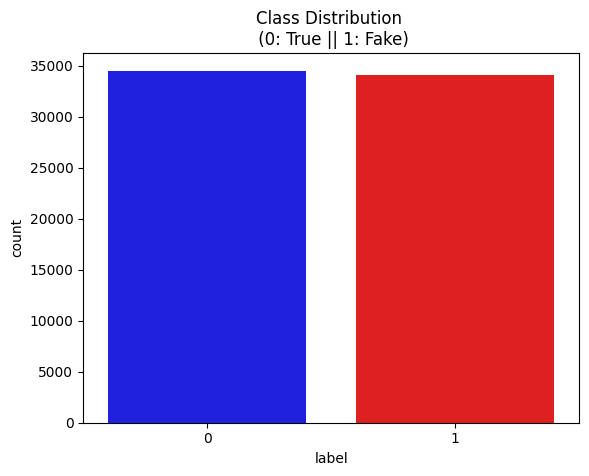

In [ ]:
sns.countplot(x='label', data=df, palette=['blue', 'red'])
plt.title('Class Distribution \n (0: True || 1: Fake)')
plt.show()

**Nhận xét nhanh:**

**Hai class True (Tin thật) và Fake (Tin giả) gần như cân bằng**, không cần xử lý gì thêm về phân phối của 2 class này.

P/s: Trong thực tế, tỉ lệ giữa 2 class có thể phải chênh lệch nhiều hơn (thậm chí là 95% True - 5% Fake) tùy vào nên tảng mạng xã hội. Nên model train trên bộ dữ liệu này chưa chắc có thể phát hiện tốt các Tin giả trong thực tế.

## Text Length Analysis

**OVERALL STATS**

In [ ]:
df_analysis = df.copy()
df_analysis['char_count'] = df_analysis['text'].apply(len)
df_analysis['word_count'] = df_analysis['text'].apply(lambda x: len(word_tokenize(x)))
df_analysis['sentence_count'] = df_analysis['text'].apply(lambda x: len(sent_tokenize(x)))

In [ ]:
df_analysis.drop(columns=['label']).describe()

,char_count,word_count,sentence_count
count,68604.000000,68604.000000,68604.000000
mean,2911.174888,552.292082,20.478398
std,3568.511861,699.634950,30.297386
min,1.000000,1.000000,1.000000
25%,870.750000,162.000000,6.000000
50%,2159.000000,402.000000,13.000000
75%,3639.000000,682.000000,25.000000
max,142961.000000,28009.000000,1444.000000


**CLASS STATS**

In [ ]:
real = df_analysis[df_analysis['label'] == 0]
fake = df_analysis[df_analysis['label'] == 1]

stats_class = {
    "char_count_by_class": {
        "real": real['char_count'].mean(),
        "fake": fake['char_count'].mean()
    },
    "word_count_by_class": {
        "real": real['word_count'].mean(),
        "fake": fake['word_count'].mean()
    },
    "sentence_count_by_class": {
        "real": real['sentence_count'].mean(),
        "fake": fake['sentence_count'].mean()
    }
}

display(pd.DataFrame(stats_class))

,char_count_by_class,word_count_by_class,sentence_count_by_class
real,3245.167439,620.194433,23.716909
fake,2572.791566,483.497066,17.197312


In [ ]:
real.drop(columns=['label']).describe()

,char_count,word_count,sentence_count
count,34526.000000,34526.000000,34526.000000
mean,3245.167439,620.194433,23.716909
std,3346.698458,670.236466,29.145645
min,3.000000,1.000000,1.000000
25%,1109.000000,204.000000,7.000000
50%,2408.000000,442.000000,16.000000
75%,4397.000000,834.000000,31.000000
max,85948.000000,17912.000000,1200.000000


In [ ]:
fake.drop(columns=['label']).describe()

,char_count,word_count,sentence_count
count,34078.000000,34078.000000,34078.000000
mean,2572.791566,483.497066,17.197312
std,3749.823330,721.734469,31.079407
min,1.000000,1.000000,1.000000
25%,589.000000,110.000000,4.000000
50%,1976.000000,368.000000,12.000000
75%,3057.750000,572.000000,20.000000
max,142961.000000,28009.000000,1444.000000


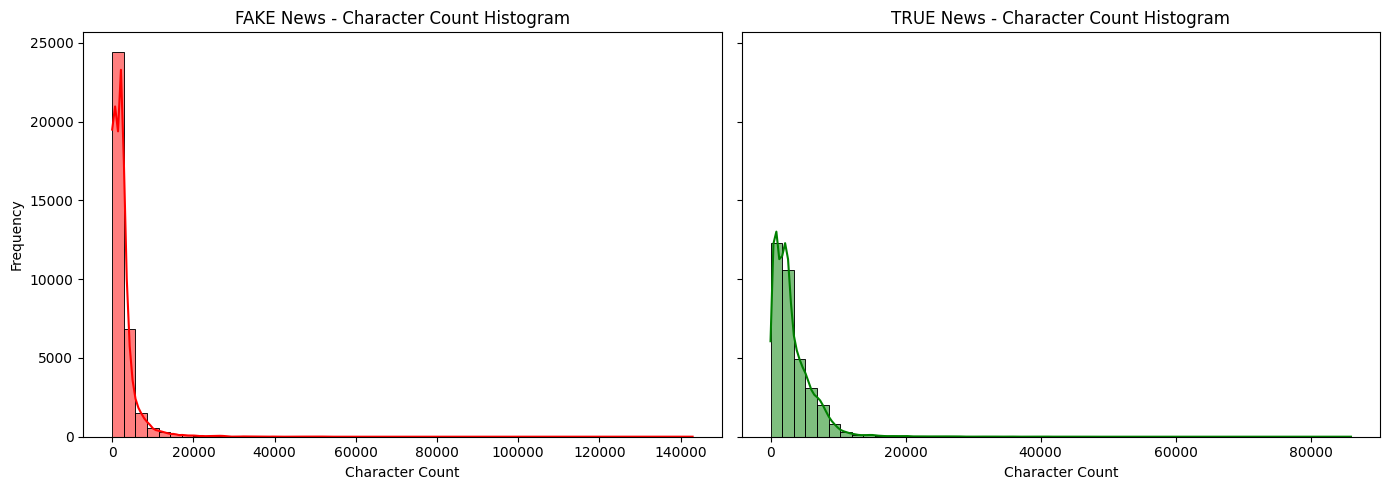

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# FAKE news - Histogram
sns.histplot(df_analysis[df_analysis['label'] == 1]['char_count'], bins=50, kde=True, ax=axes[0], color='red')
axes[0].set_title('FAKE News - Character Count Histogram')
axes[0].set_xlabel('Character Count')
axes[0].set_ylabel('Frequency')

# TRUE news - Histogram
sns.histplot(df_analysis[df_analysis['label'] == 0]['char_count'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title('TRUE News - Character Count Histogram')
axes[1].set_xlabel('Character Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

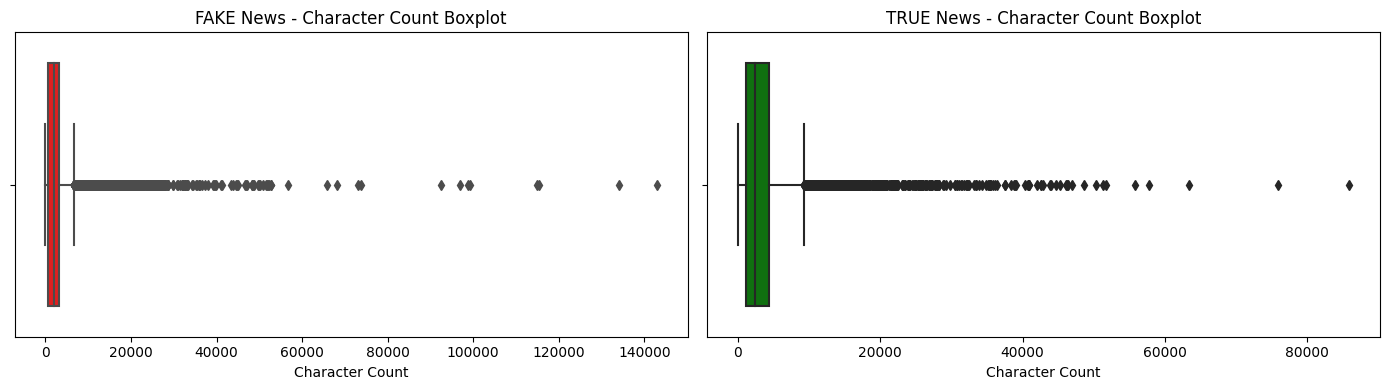

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# FAKE news - Boxplot
sns.boxplot(x=df_analysis[df_analysis['label'] == 1]['char_count'], ax=axes[0], color='red')
axes[0].set_title('FAKE News - Character Count Boxplot')
axes[0].set_xlabel('Character Count')

# TRUE news - Boxplot
sns.boxplot(x=df_analysis[df_analysis['label'] == 0]['char_count'], ax=axes[1], color='green')
axes[1].set_title('TRUE News - Character Count Boxplot')
axes[1].set_xlabel('Character Count')

plt.tight_layout()
plt.show()

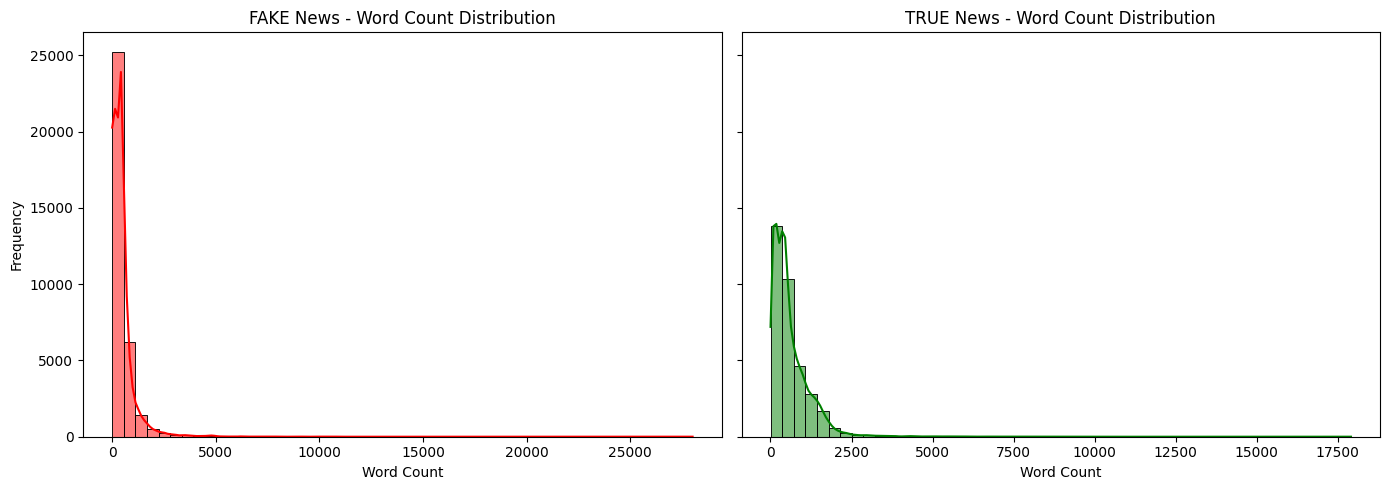

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# FAKE news
sns.histplot(df_analysis[df_analysis['label'] == 1]['word_count'], bins=50, kde=True, ax=axes[0], color='red')
axes[0].set_title('FAKE News - Word Count Distribution')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')

# TRUE news
sns.histplot(df_analysis[df_analysis['label'] == 0]['word_count'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title('TRUE News - Word Count Distribution')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

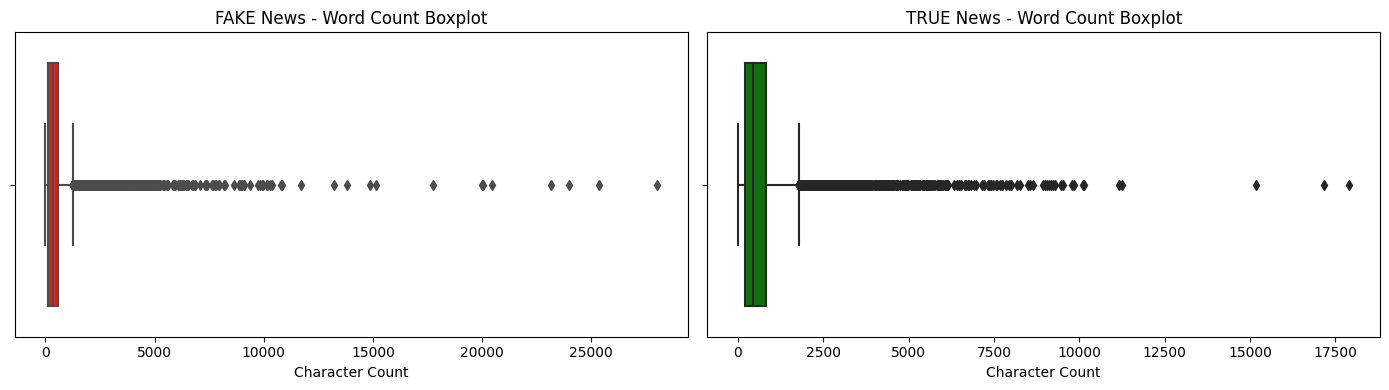

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# FAKE news - Boxplot
sns.boxplot(x=df_analysis[df_analysis['label'] == 1]['word_count'], ax=axes[0], color='red')
axes[0].set_title('FAKE News - Word Count Boxplot')
axes[0].set_xlabel('Character Count')

# TRUE news - Boxplot
sns.boxplot(x=df_analysis[df_analysis['label'] == 0]['word_count'], ax=axes[1], color='green')
axes[1].set_title('TRUE News - Word Count Boxplot')
axes[1].set_xlabel('Character Count')

plt.tight_layout()
plt.show()

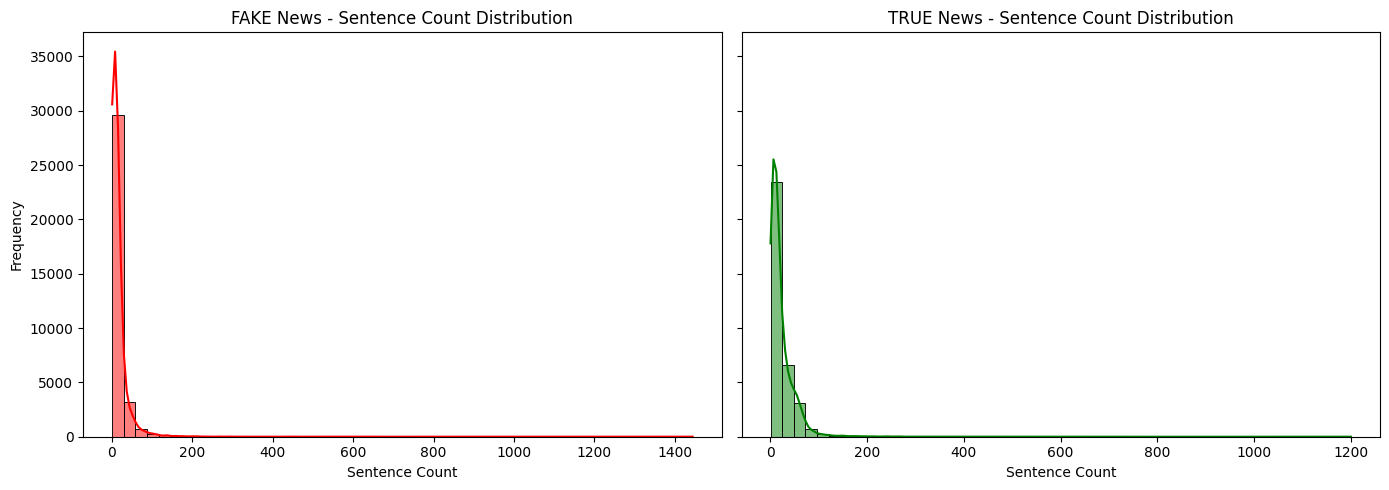

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# FAKE news
sns.histplot(df_analysis[df_analysis['label'] == 1]['sentence_count'], bins=50, kde=True, ax=axes[0], color='red')
axes[0].set_title('FAKE News - Sentence Count Distribution')
axes[0].set_xlabel('Sentence Count')
axes[0].set_ylabel('Frequency')

# TRUE news
sns.histplot(df_analysis[df_analysis['label'] == 0]['sentence_count'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title('TRUE News - Sentence Count Distribution')
axes[1].set_xlabel('Sentence Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

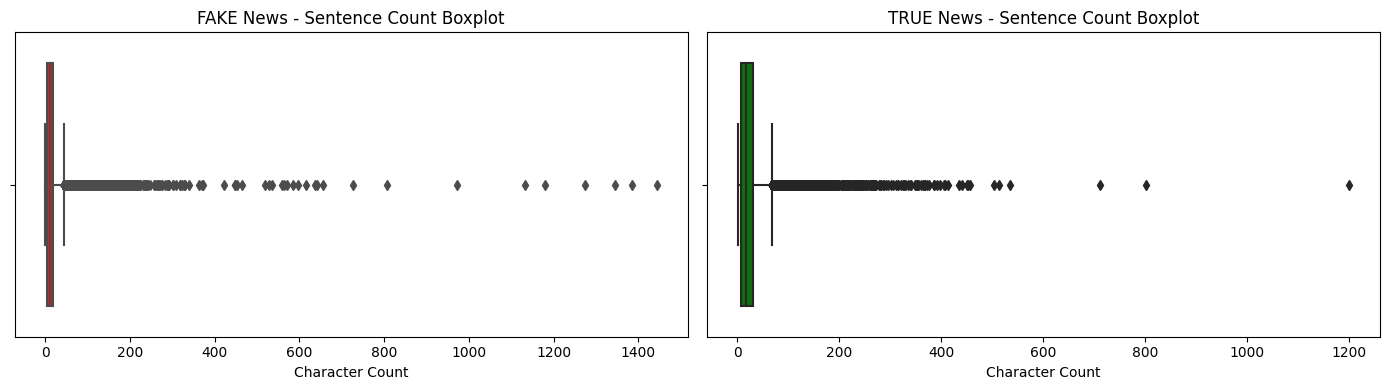

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# FAKE news - Boxplot
sns.boxplot(x=df_analysis[df_analysis['label'] == 1]['sentence_count'], ax=axes[0], color='red')
axes[0].set_title('FAKE News - Sentence Count Boxplot')
axes[0].set_xlabel('Character Count')

# TRUE news - Boxplot
sns.boxplot(x=df_analysis[df_analysis['label'] == 0]['sentence_count'], ax=axes[1], color='green')
axes[1].set_title('TRUE News - Sentence Count Boxplot')
axes[1].set_xlabel('Character Count')

plt.tight_layout()
plt.show()

**Nhận xét nhanh:**

- Trung bình chiều dài mỗi sequence lớn (~552 word) và không ổn định (độ lệch chuẩn ~700).

- Cả 2 class True và Fake đều có những sequence mà **số chữ/từ/câu** của chúng **cực kỳ ít hoặc cực kỳ nhiều** - có thể coi là **outlier**.

- Giữa 2 class True và Fake có sự khác biệt đáng kể trong trung bình số chữ, từ và câu xuất hiện. Đây có thể là do các outlier kéo lệch phân phối của 2 class.

==> Do phân phối của 2 class quá khác nhau, nếu không xử lý, có thể model sẽ nhận biết chỉ thông qua số chữ/từ/câu mà không thực sự nhận biết được nội dung và mặc dù **kết quả sau khi train có tốt cũng chưa chắc hoạt động ổn khi deploy thực tế**.


**Cách xử lý:**

**Loại bỏ Extreme Outlier và Chuẩn hóa độ dài** của các sequence

## Lexical Analysis

In [ ]:
def count_emojis(text):
    return [ch for ch in text if ch in emoji.EMOJI_DATA]

emoji_list = df_analysis['text'].apply(count_emojis)

# Flatten the list of lists
all_emojis = [emoji for sublist in emoji_list for emoji in sublist]

# Count frequency
emoji_counts = Counter(all_emojis)
print(emoji_counts)

Counter({'©': 387, '™': 276, '❤': 48, '®': 48, '😡': 25, '😉': 22, '👏': 18, '😂': 14, '🏃': 13, '♀': 13, '🙂': 13, '😀': 13, '♥': 12, '😥': 11, '🔥': 10, '♦': 9, '🌙': 8, '😍': 7, '🚨': 7, '‼': 6, '🙃': 5, '✨': 5, '⚡': 4, '☹': 4, '🏻': 4, '💯': 4, '🌟': 4, '☢': 4, '👍': 4, '🎉': 3, '💚': 3, '🐸': 3, '💜': 3, '🙄': 3, '😭': 3, '🙏': 3, '😏': 3, '🌎': 3, '🎶': 3, '💋': 3, '💩': 3, '🌞': 3, '🚽': 3, '💔': 2, '🌹': 2, '⁉': 2, '💙': 2, '🏽': 2, '😘': 2, '😬': 2, '💕': 2, '❄': 2, '👎': 2, '👇': 2, '😱': 2, '👨': 2, '🌍': 2, '😳': 2, '😛': 2, '🤔': 2, '🧀': 2, '⏰': 2, '😄': 2, '🎈': 1, '🍾': 1, '💖': 1, '💛': 1, '➡': 1, '😔': 1, '💪': 1, '🖤': 1, '😩': 1, '😒': 1, '🕊': 1, '💸': 1, '⛏': 1, '🎙': 1, '🌴': 1, '🏳': 1, '🌈': 1, '😈': 1, '👊': 1, '🏾': 1, '😫': 1, '👽': 1, '🖖': 1, '😯': 1, '🌺': 1, '✏': 1, '😝': 1, '💥': 1, '💝': 1, '😲': 1, '⚾': 1, '❗': 1, '🍑': 1, '💻': 1, '🚴': 1, '🌊': 1, '👌': 1, '🐝': 1, '😞': 1, '🍕': 1, '🕹': 1, '🌏': 1, '🗽': 1, '🍒': 1, '❌': 1, '☄': 1, '🙁': 1, '✔': 1, '😃': 1, '✒': 1, '♓': 1, '🕶': 1, '😎': 1, '🎃': 1, '☕': 1, '🤕': 1, '☮': 1, '👻': 1, '👾': 1

### Phân loại emoji cần loại bỏ
Các ký tự sau **KHÔNG NÊN** tính là emoji do không biểu đạt cảm xúc hoặc hành vi liên quan đến fake news:

| Loại                 | Ký tự         | Lý do                                                                 |
|----------------------|---------------|-----------------------------------------------------------------------|
| Ký hiệu thương mại   | ©, ®, ™      | Biểu tượng pháp lý/thương mại, không mang thông tin cảm xúc           |
| Ký hiệu giới tính    | ♀, ♂, ♓      | Ký hiệu sinh học/cung hoàng đạo, không liên quan đến fake news        |
| Modifier màu da      | 🏻, 🏽, 🏾     | Thành phần phụ trợ định dạng, không có giá trị độc lập                |
| Ký hiệu chuyên ngành | ⚓, ⚾, ✒, ⛏  | Biểu tượng ngành nghề đặc thù (hàng hải, thể thao, văn phòng)        |
| Ký hiệu ít phổ biến  | 🧀, 🕊, ✏, ✔ | Ít xuất hiện trong tin tức và không mang tín hiệu cảm xúc rõ ràng     |

### Emoji nên giữ lại phân tích
Các emoji có giá trị trong phân tích fake news, chia theo nhóm:

#### Biểu đạt cảm xúc:
```python
['❤', '😉', '😂', '🙂', '😀', '😥', '😍', '🙃', '☹', '😭', '🙏',
 '😏', '😘', '😬', '😳', '😛', '🤔', '😄', '😔', '😩', '😒', '😈',
 '😫', '😯', '😝', '😲', '😞', '😎', '🤕', '😿', ...]
```
#### Hành động & Tương tác:
```python
['👏', '👍', '👎', '👇', '👊', '🖖', '👌', '🙌', '💪', ...]
```
#### Emoji cảm xúc mạnh:
```python
['🔥', '😡', '😱', '‼', '!?', '⚠️', '🚨', '✨', '⚡', '🌟', '☢', '🎉', '❗', '❌']
```
#### Emoji xã hội:
```python
['🐸', '🌍', '🌎', '🌏', '🗽', '🏳', '🌈', '☮', ...]
```

In [ ]:
def filter_meaningful_emojis(text):
    # Danh sách emoji không mong muốn
    exclude_set = {'©', '®', '™', '♀', '♂', '♓', '🏻', '🏽', '🏾',
                  '⚓', '⚾', '✒', '🧀', '⛏', '🕊', '✏', '✔', '➡', '❄'}

    # Lọc và giữ lại emoji có ý nghĩa
    return [char for char in text
            if char not in exclude_set and emoji.is_emoji(char)]

df_analysis['emoji'] = df_analysis['text'].apply(filter_meaningful_emojis)

In [ ]:
# Tần suất emoji
df_analysis['emoji_count'] = df_analysis['emoji'].apply(
    lambda lst: sum(1 for e in lst if e in emoji.EMOJI_DATA))

# Tần suất emoji cảm xúc mạnh
strong_emojis = ['🔥', '😡', '😱', '‼', '!?', '⚠️', '🚨', '✨', '⚡', '🌟', '☢', '💥', '❗', '❌']
df_analysis['strong_emoji_count'] = df_analysis['emoji'].apply(
    lambda lst: sum(1 for e in lst if e in strong_emojis))

# Tỷ lệ emoji/độ dài văn bản
emoji_ratio = df_analysis['emoji'].str.len() / df_analysis['text'].str.len()

In [ ]:
real = df_analysis[df_analysis['label'] == 0]
fake = df_analysis[df_analysis['label'] == 1]

(0.008109830272837862,
 0.0015640386954758733,
 0.003521333411585187,
 0.0004695111215446916)

In [ ]:
real[['emoji_count' , 'strong_emoji_count']].describe()

,emoji_count,strong_emoji_count
count,34526.000000,34526.000000
mean,0.008110,0.001564
std,0.275462,0.120813
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,20.000000,18.000000


In [ ]:
fake[['emoji_count' , 'strong_emoji_count']].describe()

,emoji_count,strong_emoji_count
count,34078.000000,34078.000000
mean,0.003521,0.000470
std,0.119371,0.028661
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,14.000000,2.000000


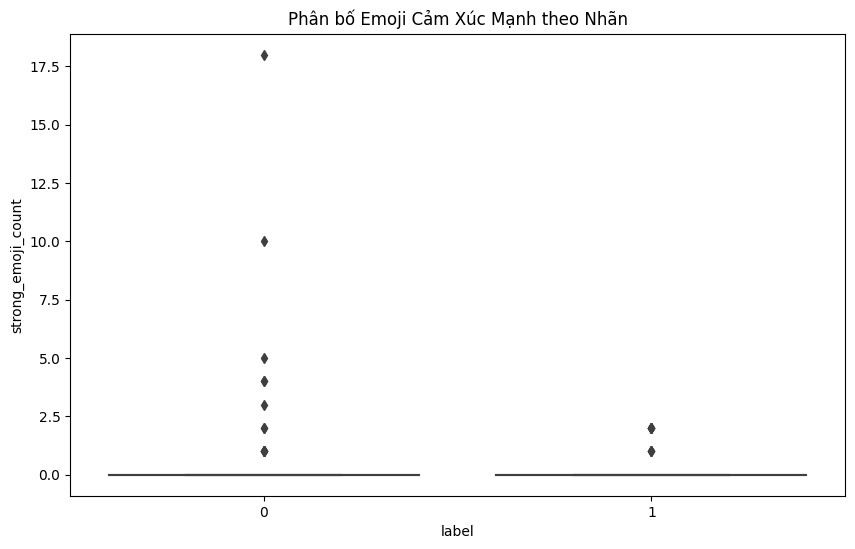

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='strong_emoji_count', data=df_analysis)
plt.title('Phân bố Emoji Cảm Xúc Mạnh theo Nhãn')
plt.show()

In [ ]:
fake_emojis = sum(df_analysis[df_analysis['label'] == 1]['emoji'], [])
real_emojis = sum(df_analysis[df_analysis['label'] == 0]['emoji'], [])

print("Top emoji fake news:", Counter(fake_emojis).most_common(20))
print("Top emoji real news:", Counter(real_emojis).most_common(20))

Top emoji fake news: [('😉', 20), ('🙂', 13), ('😀', 13), ('♦', 9), ('✨', 5), ('😂', 5), ('☢', 4), ('👍', 4), ('🚨', 3), ('😳', 2), ('😛', 2), ('‼', 2), ('♥', 2), ('🤔', 2), ('⏰', 2), ('😄', 2), ('💩', 2), ('😭', 2), ('❌', 1), ('☄', 1)]
Top emoji real news: [('❤', 47), ('😡', 24), ('👏', 18), ('🏃', 13), ('😥', 11), ('🔥', 10), ('♥', 10), ('😂', 9), ('🌙', 8), ('😍', 6), ('🙃', 5), ('⚡', 4), ('☹', 4), ('‼', 4), ('💯', 4), ('🌟', 4), ('🚨', 4), ('🎉', 3), ('💜', 3), ('🙏', 3)]


**Nhận xét nhanh:**

- Các **emoji có tần suất xuất hiện rất thấp và rất đa dạng**, tuy có sự khác biệt giữa 2 class nhưng muốn sử dụng được thì ta cần phải gom nhóm và encode cẩn thận. Đồng thời, cũng **tăng lượng token và phức tạp hơn khi train**.

==> **Có thể loại bỏ các emoji** để chừa token cho những yếu tố khác có tính phân loại mạnh hơn, đồng thời đơn giản hơn cho model khi train.

In [ ]:
def contains_html_or_url(sequence):
    html_pattern = r'<[^>]+>'
    url_pattern = r'(https?:\/\/|www\.)[\w\-\.]+\.[a-z]{2,}(\/\S*)?'

    return bool(
        re.search(html_pattern, sequence) or
        re.search(url_pattern, sequence, re.IGNORECASE)
    )

df_analysis['url'] = df_analysis['text'].apply(contains_html_or_url)

In [ ]:
stop_words = set(stopwords.words('english'))

# Tokenize
df_analysis['tokens'] = df_analysis['text'].str.lower().apply(word_tokenize)

# Words only
df_analysis['alpha_tokens'] = df_analysis['tokens'].apply(lambda tokens: [t for t in tokens if t.isalpha()])

In [ ]:
def calculate_ttr_from_tokens(tokens):
    return len(set(tokens)) / len(tokens) if tokens else 0

def count_stopwords_from_tokens(tokens):
    return sum(1 for token in tokens if token in stop_words)

df_analysis['ttr'] = df_analysis['alpha_tokens'].apply(calculate_ttr_from_tokens)
df_analysis['stopword_count'] = df_analysis['tokens'].apply(count_stopwords_from_tokens)

df_analysis['punctuation_count'] = df_analysis['text'].apply(
    lambda text: sum(1 for char in text if char in string.punctuation)
)

df_analysis['caps_count'] = df_analysis['text'].apply(
    lambda text: sum(1 for word in text.split() if word.isupper())
)

df_analysis['exclamation_count'] = df_analysis['text'].str.count('!')


real = df_analysis[df_analysis['label'] == 0]
fake = df_analysis[df_analysis['label'] == 1]

In [ ]:
lexical_stats = {
    "ttr_by_class": {
        "real": real['ttr'].mean(),
        "fake": fake['ttr'].mean()
    },
    "stopwords_by_class": {
        "real": real['stopword_count'].mean(),
        "fake": fake['stopword_count'].mean()
    },
    "punctuation_by_class": {
        "real": real['punctuation_count'].mean(),
        "fake": fake['punctuation_count'].mean()
    },
    "caps_by_class": {
        "real": real['caps_count'].mean(),
        "fake": fake['caps_count'].mean()
    },
    "exclamations_by_class": {
        "real": real['exclamation_count'].mean(),
        "fake": fake['exclamation_count'].mean()
    },
    "url_by_class": {
        "real": real['url'].mean(),
        "fake": fake['url'].mean()
    }
}

display(pd.DataFrame(lexical_stats))

,ttr_by_class,stopwords_by_class,punctuation_by_class,caps_by_class,exclamations_by_class,url_by_class
real,0.563028,231.141517,71.770637,7.457539,0.139808,0.001477
fake,0.617527,188.397412,60.317800,8.342362,0.652620,0.109367


**Nhận xét nhanh:**

- **Tin giả** có **Type-Token Ratio (TTR)** hay **độ đa dạng từ vựng cao hơn** so với tin thật mặc dù không nhiều. Điều này có thể là do nội dung tin giả thường được viết nhằm thu hút sự chú ý, nên sử dụng nhiều từ khác nhau, không lặp lại nhiều.

- **Tin thật** sử dụng **nhiều stopwords hơn** (231.1 > 188.4) tin giả khá nhiều, cho thấy văn phong tự nhiên và mang tính mô tả cao hơn (như văn báo chí chuẩn). Ngược lại, tin giả có thể bỏ bớt stopwords để câu từ ngắn gọn, gây tác động mạnh hơn.

- **Tin thật** chứa **nhiều dấu câu hơn** (71.8 > 60.3), có thể do cấu trúc câu rõ ràng, nhiều câu phức, trích dẫn, dấu ngoặc v.v. Trong khi tin giả có xu hướng câu ngắn, trực diện.

- **Tin giả** có **nhiều từ viết IN HOA** hơn (8.34 > 7.46), có thể do xu hướng nhấn mạnh, giật gân (“BREAKING”, “SHOCKING”, “MUST SEE”, v.v).

- **Dấu chấm than xuất hiện nhiều hơn rõ rệt trong tin giả** (0.6526 > 0.1398) , cho thấy xu hướng kích động cảm xúc hoặc nhấn mạnh. Đây là đặc trưng rất điển hình trong ngôn ngữ giật gân, thao túng.

- **Tin giả** có **tỉ lệ xuất hiện URL/HTML** nhiều hơn hẳn (0.109 > 0.0014), có thể do xu hướng muốn chèn link giả để khiến người đọc tưởng là trích dẫn uy tín (ví dụ như bbc.com) hoặc dẫn đến trang chứa mã độc, quảng cáo, hoặc thu thập thông tin cá nhân.

==> Vì tin giả và tin thật có **những đặc điểm khác nhau từ vừa đến rõ rệt** như trên mặc dù chưa kể tới nội dung/ý nghĩa của văn bản, ta kỳ vọng mô hình sẽ có khả năng phân biệt tốt với bộ dữ liệu này.

**Cách xử lý:**

Trong bước chuẩn hóa dữ liệu, ta sẽ:
- **Loại bỏ các emoji**
- **Không chuyển thành Lowercase** (in thường)
- **Không xóa Stopwords**
- **Không xóa dấu chấm than và dấu câu**
- **Không xóa mà encode các URL/HTML**

Vì tỉ lệ của các yếu tố trên giữa 2 class là khác nhau, nếu chuẩn hóa sai sẽ làm mất các thông tin này.

## N-grams & Keywords Analysis

In [ ]:
def get_top_ngrams(corpus, ngram_range=(1,1), n=10):
    vec = CountVectorizer(ngram_range=ngram_range,
                          stop_words='english',
                          max_features=None)  # Lấy hết vocab
    X = vec.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_unique_tokens(text_series):
    text = text_series.str.lower().str.cat(sep=' ')
    tokens = [t for t in text.split() if t.isalpha()]
    return set(tokens)

# Top N-grams
top_n=10
real_unigrams = get_top_ngrams(real['text'], (1,1), top_n)
fake_unigrams = get_top_ngrams(fake['text'], (1,1), top_n)
real_bigrams = get_top_ngrams(real['text'], (2,2), top_n)
fake_bigrams = get_top_ngrams(fake['text'], (2,2), top_n)

# Unique words
real_words = get_unique_tokens(real['text'])
fake_words = get_unique_tokens(fake['text'])
unique_real = real_words - fake_words
unique_fake = fake_words - real_words

In [ ]:
ngram_stats = {
    "top_real_unigrams": real_unigrams,
    "top_fake_unigrams": fake_unigrams,
    "top_real_bigrams": real_bigrams,
    "top_fake_bigrams": fake_bigrams,
}

display(pd.DataFrame(ngram_stats))

,top_real_unigrams,top_fake_unigrams,top_real_bigrams,top_fake_bigrams
0,"(said, 166497)","(trump, 89391)","(united states, 20181)","(donald trump, 19284)"
1,"(trump, 96925)","(people, 38937)","(mr trump, 17402)","(hillary clinton, 12507)"
2,"(mr, 65801)","(said, 37327)","(donald trump, 16040)","(united states, 9241)"
3,"(president, 47573)","(clinton, 33690)","(white house, 12738)","(featured image, 7877)"
4,"(new, 38674)","(president, 29880)","(new york, 11294)","(white house, 7298)"
5,"(people, 38456)","(just, 27747)","(president donald, 6744)","(twitter com, 5817)"
6,"(state, 35455)","(like, 25037)","(hillary clinton, 5807)","(pic twitter, 5509)"
7,"(states, 28632)","(hillary, 23216)","(islamic state, 5774)","(new york, 5311)"
8,"(government, 26715)","(new, 21490)","(north korea, 5676)","(president obama, 4266)"
9,"(clinton, 26475)","(donald, 20914)","(trump said, 5319)","(getty images, 4135)"


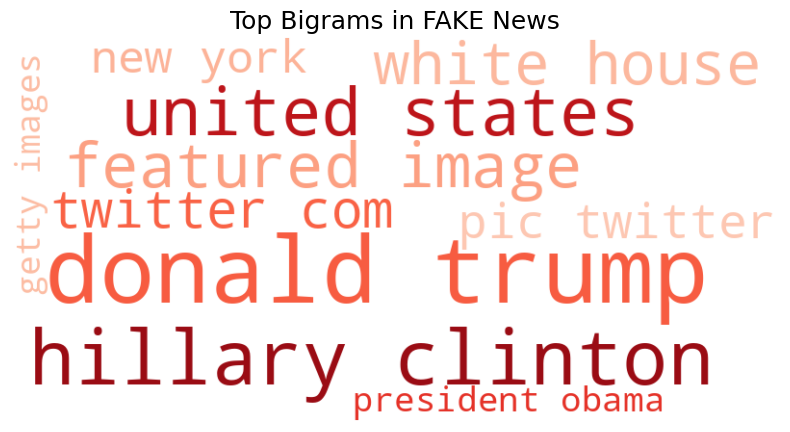

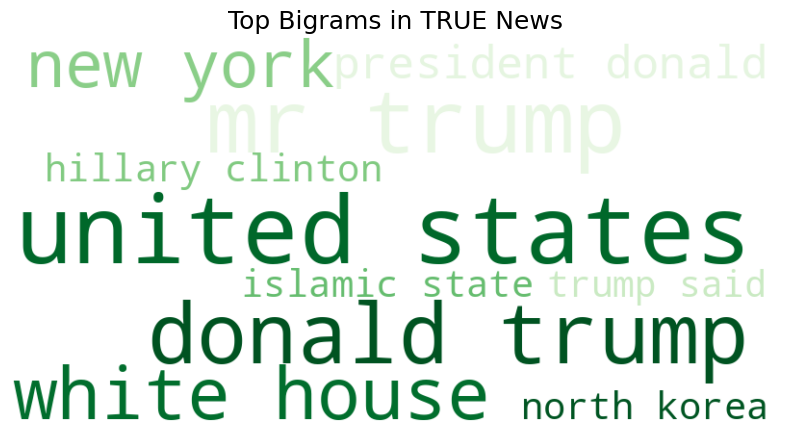

In [ ]:
from wordcloud import WordCloud

# Convert list of (word, score) to dict
def make_wordcloud_from_scores(score_list, title, color='black'):
    freq_dict = dict(score_list)
    wc = WordCloud(width=800, height=400, background_color='white', colormap=color)
    wc.generate_from_frequencies(freq_dict)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=18)
    plt.show()

make_wordcloud_from_scores(fake_bigrams, "Top Bigrams in FAKE News", color='Reds')
make_wordcloud_from_scores(real_bigrams, "Top Bigrams in TRUE News", color='Greens')

In [ ]:
unique_stats = {
    "unique_real_words": list(unique_real)[:top_n*2],
    "unique_fake_words": list(unique_fake)[:top_n*2]
}

display(pd.DataFrame(unique_stats))

,unique_real_words,unique_fake_words
0,sama,junio
1,quebradillas,acropolis
2,milly,политиков
3,systemless,nahi
4,tzotzil,schlema
5,tanno,krikliy
6,coltart,доводится
7,sportscasters,απρίλιο
8,kiyeng,wszystkimi
9,kugelman,aeroballistic


**Nhận xét nhanh:**

- Các **Unigram phổ biến nhất** ở cả **tin thật và tin giả đều khá giống nhau**, chỉ có tin thật thì từ `said` được ưu tiên xuất hiện rất nhiều (166497 lần) có thể vì ngôn ngữ trung lập, mang tính trích dẫn và theo phong cách báo chí truyền thống.

- Tuy nhiên, trong các **Bigrams phổ biến nhất**, sự khác nhau giữa tin thật và tin giả trở nên rõ ràng hơn khi:
    - **Tin thật**: Chứa nhiều cụm danh từ chính trị chính thống và trang trọng, như `mr trump` và `president donald` thể hiện tính báo cáo chính xác và có nguồn gốc rõ ràng.
    - **Tin giả**: Xuất hiện nhiều cụm thiếu chuyên nghiệp như `featured image`, `twitter com`, `pic twitter` và `getty images`, cho thấy tin được lấy từ nhiều yếu tố hình ảnh / mạng xã hội chưa xác thực (pic twitter, featured image) - đây cũng là đặc trưng của tin giả lan truyền trên mạng.

- Đối với các **Unique Words**:
    - **Tin thật**: `röschmann`, `atatürk`, `precis`, `greenslade` ... → Có thể không phải là tiếng Anh nhưng lại là những tên riêng, địa danh, thuật ngữ văn hóa/lịch sử, cho thấy tính quốc tế hoặc chuyên sâu.
    - **Tin giả**: `sooooooooo`, `buttpress`, `μειωθούν`, `преступники`, `ruhsal`, `idealleştirilen` → Các từ cảm thán / ngôn ngữ mạng thiếu chuyên nghiệp (sooooooooo, buttpress) và các ngôn ngữ khác nhưng không phải tên riêng, quy chuẩn phổ biến - dấu hiệu tin tổng hợp, thiếu kiểm duyệt hoặc dịch sai.

## Readability Analysis

In [ ]:
df_analysis['flesch_reading'] = df_analysis['text'].apply(textstat.flesch_reading_ease)
df_analysis['gunning_fog'] = df_analysis['text'].apply(textstat.gunning_fog)
df_analysis['smog_index'] = df_analysis['text'].apply(
    lambda x: textstat.smog_index(x) if len(sent_tokenize(x)) >= 3 else np.nan
)

real = df_analysis[df_analysis['label'] == 0]
fake = df_analysis[df_analysis['label'] == 1]

In [ ]:
real[['flesch_reading' , 'gunning_fog', 'smog_index']].describe()

,flesch_reading,gunning_fog,smog_index
count,34526.000000,34526.000000,31998.000000
mean,45.770295,14.893719,13.868456
std,11.444832,2.887916,1.868085
min,-132.580000,0.400000,5.985473
25%,38.831034,13.046670,12.663936
50%,45.808306,14.814514,13.889129
75%,52.934137,16.568608,15.048004
max,121.220000,73.647737,38.728876


In [ ]:
fake[['flesch_reading' , 'gunning_fog', 'smog_index']].describe()

,flesch_reading,gunning_fog,smog_index
count,34078.000000,34078.000000,27970.000000
mean,48.579375,13.978245,13.186240
std,26.852197,3.887678,2.242345
min,-2078.380000,0.000000,3.129100
25%,40.791420,11.743689,11.855464
50%,50.161880,13.757860,13.115065
75%,58.444434,15.904023,14.498978
max,121.220000,71.825767,35.276519


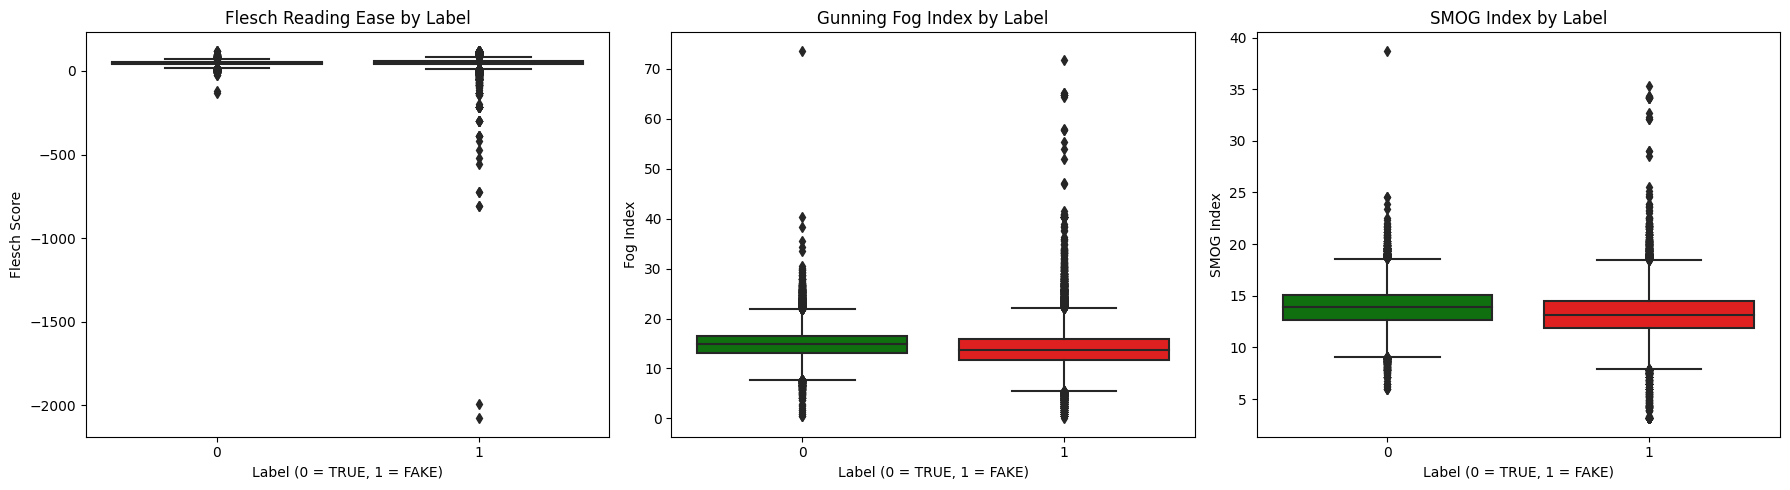

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Flesch Reading Ease
sns.boxplot(data=df_analysis, x='label', y='flesch_reading', ax=axes[0], palette={0: "green", 1: "red"})
axes[0].set_title('Flesch Reading Ease by Label')
axes[0].set_xlabel('Label (0 = TRUE, 1 = FAKE)')
axes[0].set_ylabel('Flesch Score')

# 2. Gunning Fog Index
sns.boxplot(data=df_analysis, x='label', y='gunning_fog', ax=axes[1], palette={0: "green", 1: "red"})
axes[1].set_title('Gunning Fog Index by Label')
axes[1].set_xlabel('Label (0 = TRUE, 1 = FAKE)')
axes[1].set_ylabel('Fog Index')

# 3. SMOG Index
sns.boxplot(data=df_analysis, x='label', y='smog_index', ax=axes[2], palette={0: "green", 1: "red"})
axes[2].set_title('SMOG Index by Label')
axes[2].set_xlabel('Label (0 = TRUE, 1 = FAKE)')
axes[2].set_ylabel('SMOG Index')

plt.tight_layout()
plt.show()

In [ ]:
true_outlier_condition = (df_analysis['gunning_fog'] > 70) & (df_analysis['label'] == 0)
df_analysis[true_outlier_condition]

,text,label,char_count,word_count,sentence_count,emoji,emoji_count,strong_emoji_count,tokens,alpha_tokens,ttr,stopword_count,punctuation_count,caps_count,exclamation_count,flesch_reading,gunning_fog,smog_index
29610,The complete list of winners: Record of the Ye...,0,7426,1417,4,[],0,0,"[the, complete, list, of, winners, :, record, ...","[the, complete, list, of, winners, record, of,...",0.559548,118,174,17,1,-118.787593,73.647737,38.728876


In [ ]:
fake_outlier_condition = (df_analysis['flesch_reading'] < -700) & (df_analysis['label'] == 1)
df_analysis[fake_outlier_condition]

,text,label,char_count,word_count,sentence_count,emoji,emoji_count,strong_emoji_count,tokens,alpha_tokens,ttr,stopword_count,punctuation_count,caps_count,exclamation_count,flesch_reading,gunning_fog,smog_index
44304,https://100percentfedup.com/served-roy-moore-v...,1,145,3,1,[],0,0,"[https, :, //100percentfedup.com/served-roy-mo...",[https],1.0,0,19,0,0,-2078.38,40.4,NaN
46897,https://www.youtube.com/watch?feature=player_e...,1,67,7,1,[],0,0,"[https, :, //www.youtube.com/watch, ?, feature...",[https],1.0,0,11,0,0,-809.38,40.4,NaN
50075,https://100percentfedup.com/video-hillary-aske...,1,88,3,1,[],0,0,"[https, :, //100percentfedup.com/video-hillary...",[https],1.0,0,17,0,0,-724.78,40.4,NaN
50076,https://100percentfedup.com/12-yr-old-black-co...,1,149,3,1,[],0,0,"[https, :, //100percentfedup.com/12-yr-old-bla...",[https],1.0,0,26,0,0,-1993.78,40.4,NaN
50378,https://fedup.wpengine.com/wp-content/uploads/...,1,74,3,1,[],0,0,"[https, :, //fedup.wpengine.com/wp-content/upl...",[https],1.0,0,12,0,0,-724.78,40.4,NaN
50379,https://fedup.wpengine.com/wp-content/uploads/...,1,66,3,1,[],0,0,"[https, :, //fedup.wpengine.com/wp-content/upl...",[https],1.0,0,12,0,0,-809.38,40.4,NaN


**Nhận xét nhanh:**

Từ các thống kê và boxplot của metric tượng trưng cho độ dễ hiểu (Readability) của văn bản ta thấy:

- Cả **2 class Fake và True** đều có **trung bình `flesch_reading`, `gunning_fog` và `smog_index` khá gần nhau**. Điều này cho thấy độ dễ hiểu của 2 class là khá tương đồng.

- Các **tin thật (True) có ít outlier hơn**, hầu như đều co cụm lại. Nếu loại bỏ outlier này (`gunning_fog` > 70 và `smog_index` > 35) thì trung bình `gunning_fog` và `smog_index` của tin thật sẽ giảm (và `flesch_reading` sẽ tăng) khiến mean của 2 class càng gần nhau hơn nữa. Tuy nhiên, các tin thật lúc này sẽ có khoảng giá trị nhỏ, về đúng với phân phối chuẩn hơn (ổn định hơn) tức là chất lượng ngôn ngữ của tin thật ổn định giống thực tế.

- Các **tin giả (Fake) có nhiều outlier (thậm chí là extreme outlier)** khi có những sequence có điểm `flesch_reading` âm, tới giá trị là -2000. Điều này cho thấy tin giả có nhiều bài viết rất khó đọc, nguyên nhân có thể là do các câu rất dài hoặc từ rất phức tạp (nhiều âm tiết). Điều này cũng đúng với thực tế, khi có nhiều tin giả có chất lượng rất thấp (đến từ sai cách ngắt câu, lỗi spacing, lỗi dịch thuật, lỗi font...) làm khả năng đọc được của chúng giảm rõ rệt.

==> Các tin có Readability không tốt có thể được phân loại dễ dàng.

**Cách xử lý:**

- Loại các sequence ở trên để phân phối Readability của 2 class về gần phân phối chuẩn hơn.

## Sentiment Analysis

In [ ]:
df_analysis['textblob_polarity'] = df_analysis['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_analysis['textblob_subjectivity'] = df_analysis['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

real = df_analysis[df_analysis['label'] == 0]
fake = df_analysis[df_analysis['label'] == 1]

In [ ]:
real[['textblob_polarity' , 'textblob_subjectivity']].describe()

,textblob_polarity,textblob_subjectivity
count,34526.000000,34526.000000
mean,0.061255,0.380323
std,0.094210,0.114193
min,-1.000000,0.000000
25%,0.009562,0.323613
50%,0.061772,0.388718
75%,0.110358,0.446191
max,1.000000,1.000000


In [ ]:
fake[['textblob_polarity' , 'textblob_subjectivity']].describe()

,textblob_polarity,textblob_subjectivity
count,34078.000000,34078.000000
mean,0.054426,0.411181
std,0.130789,0.169008
min,-1.000000,0.000000
25%,0.000000,0.353790
50%,0.050652,0.435314
75%,0.114168,0.500748
max,1.000000,1.000000


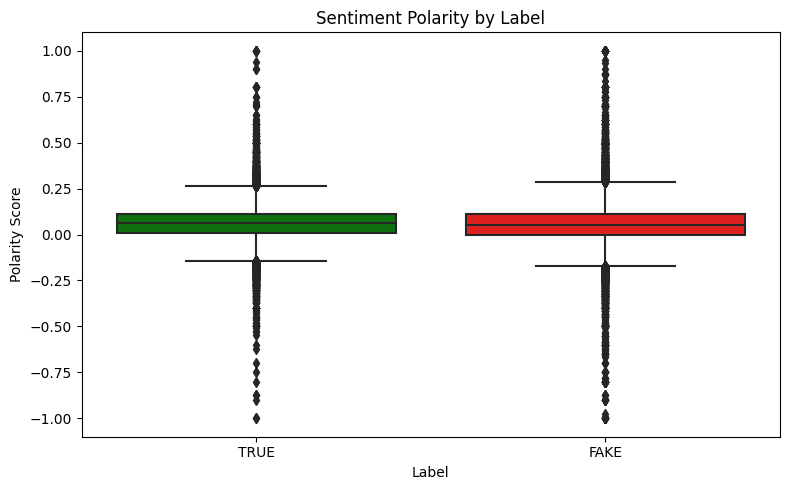

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=df_analysis, x='label', y='textblob_polarity', palette={0: "green", 1: "red"})
plt.xticks([0, 1], ['TRUE', 'FAKE'])
plt.title('Sentiment Polarity by Label')
plt.ylabel('Polarity Score')
plt.xlabel('Label')

plt.tight_layout()
plt.show()

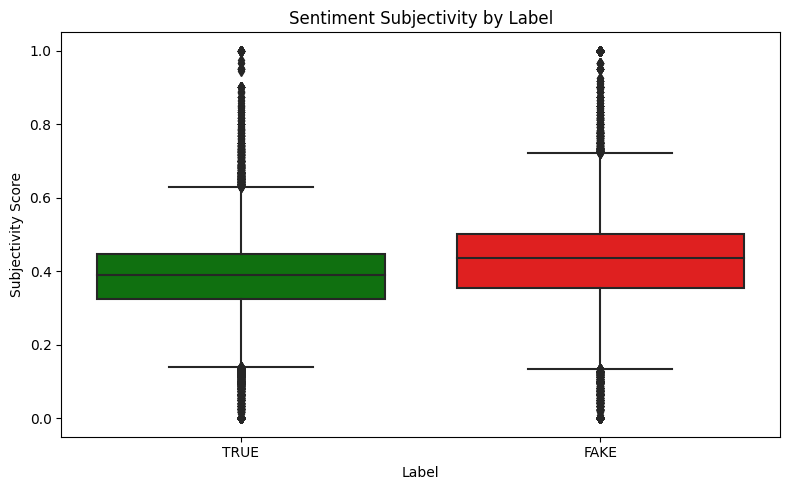

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=df_analysis, x='label', y='textblob_subjectivity', palette={0: "green", 1: "red"})
plt.xticks([0, 1], ['TRUE', 'FAKE'])
plt.title('Sentiment Subjectivity by Label')
plt.ylabel('Subjectivity Score')
plt.xlabel('Label')

plt.tight_layout()
plt.show()

**Nhận xét nhanh:**

Từ các thống kê và boxplot của trên ta thấy:

- Cả **2 class Fake và True** đều có **trung bình Polarity (mức độ cảm xúc tích cực/tiêu cực) khá gần nhau và gần 0**. Điều này cho thấy văn bản của 2 class trung bình khá trung tính, tuy nhiên class True tập trung hơn vào Mean, ít outlier về 2 phía 1 và -1, trong khi class Fake lại có nhiều sequence nằm ở 2 phía 1 và -1 hơn.

- Các **tin thật (True) có tính chủ quan (Subjectivity) thấp hơn**, hầu như co cụm lại. Điều này giống với thực tế khi các tin thật thường mang tính khách quan hơn.

==> Dữ liệu đúng so với thực tế.

**Tổng kết:**

- Từ kết quả phân tích trên, ta thấy 2 class Fake và True của bộ dữ liệu này có nhiều yếu tố giúp phân tách chúng khá tốt. Ta kỳ vọng model xây dựng dựa trên bộ dữ liệu này sẽ ra kết quả tốt.

- Cách xử lý dữ liệu sau khi đã EDA:

    - Nên loại bỏ các Extreme Outlier để cân bằng lại tương quan số chữ, số từ và số câu của 2 class
    - Loại các sequence outlier để phân phối Readability của 2 class về gần phân phối chuẩn hơn
    - Chuẩn hóa độ dài của các sequence
    - Không chuyển thành Lowercase (in thường)*
    - Không xóa Stopwords
    - Không xóa dấu chấm than và dấu câu
    - Không xóa mà encode các URL/HTML

  
*P/S: Tin giả và tin thật có cách biểu diễn khá khác nhau (chi tiết ở phần Lexical Analysis), nên nếu muốn model tập trung phân loại tin giả dựa nhiều hơn vào Ý NGHĨA của văn bản thay vì cách ghi, ta có thể chuẩn hóa (normalize) bằng cách chuyển về dạng viết thường (lowercase). Ở bài toán này, ta chỉ muốn phân tách tốt 2 class nên sẽ không đưa về dạng lowercase.

# Data Processing

## Handle Outliers

Ta có thể loại bỏ các outlier theo cách thống kê (Z-score hoặc IQR). Tuy nhiên, ta có thể tận dụng các đoạn sequence dài bằng cách cắt bỏ (truncation) khi tokenize, nên ta chỉ cần loại các sequence quá ngắn, vô nghĩa.

In [ ]:
def remove_outliers(df):
    # Loại các sequence vô nghĩa
    condition = (df_analysis['char_count'] < 5) | (df_analysis['word_count'] < 3) | (df_analysis['sentence_count'] < 1)
    index = df_analysis[condition].index

    # Loại các outlier Readability
    index = index.append(df_analysis[true_outlier_condition].index)
    index = index.append(df_analysis[fake_outlier_condition].index)

    df_analysis[fake_outlier_condition].index
    df = df.drop(index)

    return df

df = remove_outliers(df.copy())

## Normalization & Processing

In [ ]:
def data_processing(text):
    ### Thay thế URL/HTML
    text = re.sub(r'(https?:\/\/|www\.)[\w\-\.]+\.[a-z]{2,}(\/\S*)?', '[URL]', text, flags=re.IGNORECASE)
    text = re.sub(r'<[^>]+>', '[HTML]', text)

    ### Xóa khoảng trắng thừa, newline và chữ số
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d', '', text)
    return text

df['text'] = df['text'].apply(data_processing)

# Machine Learning Models

Bài toán của ta là **Phân loại Tin giả (Fake News Classification)** - đúng hơn là phân loại nhị phân với 2 class Fake và True. Như vậy, ta có các model phân loại sau phù hợp với bài toán mà ta có thể thử:

- **Model ML truyền thống:** Logistic Regression, Naive Bayes, SVM
- **Model RNN:** LSTM
- **Model Transformer-based:** Các biến thể BERT, XLNet, Deberta-v3

Mỗi (loại) model đều có điểm mạnh, điểm yếu và định dạng input riêng nên ta sẽ xử lý khác nhau cho từng (loại) model. Từ đó, ghi nhận và so sánh metric của các model trên tập Test.



## Chia tập Train-Test

In [ ]:
def prepare_X_y(df):
    X = df['text']
    y = df['label']
    return X, y

X, y = prepare_X_y(df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Vector hóa (bằng TF-IDF) cho các model ML truyền thống

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

## Model ML truyền thống

Với các **mô hình học máy truyền thống**, dữ liệu đầu vào cần được biểu diễn dưới dạng vector số để mô hình có thể xử lý được. Một trong những kỹ thuật phổ biến là vector hóa văn bản bằng các phương pháp như Bag-of-Words (CountVectorizer) hoặc TF-IDF. Trong phân tích này, chúng tôi lựa chọn sử dụng TF-IDF (Term Frequency - Inverse Document Frequency) nhằm thể hiện mức độ quan trọng của một từ trong một văn bản tương quan với toàn bộ tập văn bản.

Các thuật toán học máy được sử dụng đối với bộ dữ liệu này bao gồm: **Logistic Regression**, **Naive Bayes**, **SVM**.



### 1. Logistic Regression

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [500, 1000]
}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression()
grid = GridSearchCV(LR, param_grid, cv=10, scoring='f1', verbose=1, n_jobs=-1)
grid.fit(xv_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [500, 1000], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1', verbose=1)

In [ ]:
print("Best parameters:", grid.best_params_)
print("Best F1-score on CV:", grid.best_score_)

Best parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1-score on CV: 0.9481112781991353


In [ ]:
# Dự đoán trên tập train
y_train_pred = grid.best_estimator_.predict(xv_train)

# Dự đoán trên tập test
y_test_pred = grid.best_estimator_.predict(xv_test)

In [ ]:
def calculate_performance(y_true, y_pred, show_plot=True):
    acc = round(accuracy_score(y_true, y_pred), 4)
    prec = round(precision_score(y_true, y_pred), 4)
    rec = round(recall_score(y_true, y_pred), 4)
    f1 = round(f1_score(y_true, y_pred), 4)

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    if show_plot:
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.tight_layout()
        plt.show()

    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    }

Train Performance:
Accuracy: 0.9906
Precision: 0.9915
Recall: 0.9895
F1-score: 0.9905

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24189
           1       0.99      0.99      0.99     23807

    accuracy                           0.99     47996
   macro avg       0.99      0.99      0.99     47996
weighted avg       0.99      0.99      0.99     47996



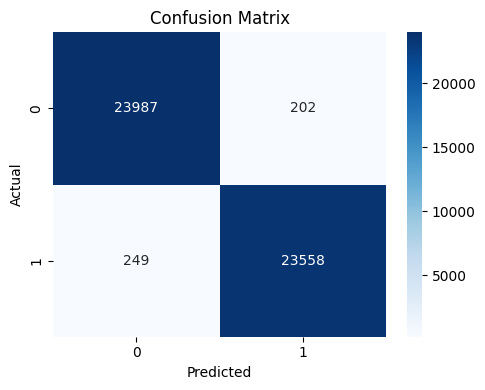


Test Performance:
Accuracy: 0.9479
Precision: 0.947
Recall: 0.9485
F1-score: 0.9477

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10333
           1       0.95      0.95      0.95     10238

    accuracy                           0.95     20571
   macro avg       0.95      0.95      0.95     20571
weighted avg       0.95      0.95      0.95     20571



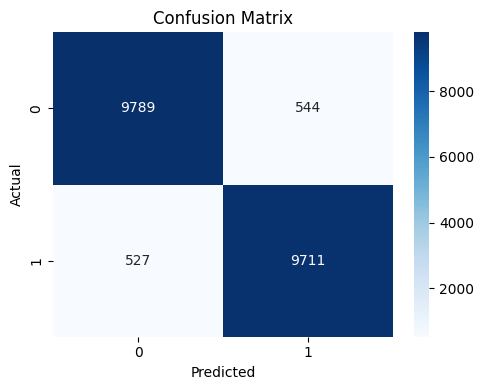

In [ ]:
print("Train Performance:")
train_metrics_LR = calculate_performance(y_train, y_train_pred)

print("\nTest Performance:")
test_metric_LR = calculate_performance(y_test, y_test_pred)

**Logistic Regression**

 Điểm mạnh

- Thời gian huấn luyện nhanh: Mô hình chỉ mất khoảng 5 phút để tìm ra bộ tham số tối ưu.
- Hiệu suất huấn luyện rất cao: Các chỉ số như Accuracy, Precision, Recall và F1-score trên tập train gần như đạt 1.0, cho thấy mô hình học rất tốt trên dữ liệu huấn luyện.
- Kết quả kiểm tra đáng tin cậy: Trên tập test, mô hình đạt khoảng 0.95 ở tất cả các chỉ số đánh giá, phản ánh khả năng tổng quát hóa tốt.
- Tính diễn giải cao: Là một mô hình tuyến tính, Logistic Regression cho phép giải thích rõ ràng ảnh hưởng của từng đặc trưng đến kết quả dự đoán, phù hợp với các bài toán yêu cầu tính minh bạch.


 Điểm yếu

- Tồn tại lỗi phân loại: Khoảng 5% dữ liệu kiểm tra bị phân loại sai ở cả hai lớp (0 và 1), điều này có thể dẫn đến rủi ro đáng kể khi triển khai mô hình trong môi trường thực tế với số lượng lớn tin tức.
- Giới hạn về khả năng mô hình hóa quan hệ phi tuyến: Logistic Regression là mô hình tuyến tính nên có thể gặp khó khăn trong việc nắm bắt các mối quan hệ phức tạp giữa các đặc trưng trong dữ liệu.

### 2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

param_grid = {
    'alpha': [
        1e-10, 1e-5, 1e-3, 5e-3, 0.01, 0.05,
        0.1, 0.3, 0.5, 0.7, 1.0, 10.0
    ]
}
nb = MultinomialNB()
grid_nb = GridSearchCV(nb, param_grid, cv=10, scoring='f1', n_jobs=-1, verbose=1)
grid_nb.fit(xv_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.005, 0.01, 0.05, 0.1,
                                   0.3, 0.5, 0.7, 1.0, 10.0]},
             scoring='f1', verbose=1)

In [ ]:
print("Best parameters:", grid_nb.best_params_)
print("Best F1-score on CV:", round(grid_nb.best_score_, 4))

Best parameters: {'alpha': 0.001}
Best F1-score on CV: 0.8849


In [ ]:
# Dự đoán
y_train_pred = grid_nb.predict(xv_train)
y_test_pred = grid_nb.predict(xv_test)

Train Performance:
Accuracy: 0.9508
Precision: 0.9568
Recall: 0.9435
F1-score: 0.9501

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     24189
           1       0.96      0.94      0.95     23807

    accuracy                           0.95     47996
   macro avg       0.95      0.95      0.95     47996
weighted avg       0.95      0.95      0.95     47996



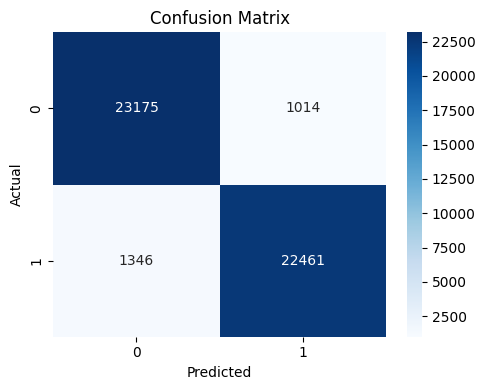


Test Performance:
Accuracy: 0.8872
Precision: 0.9028
Recall: 0.8666
F1-score: 0.8843

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     10333
           1       0.90      0.87      0.88     10238

    accuracy                           0.89     20571
   macro avg       0.89      0.89      0.89     20571
weighted avg       0.89      0.89      0.89     20571



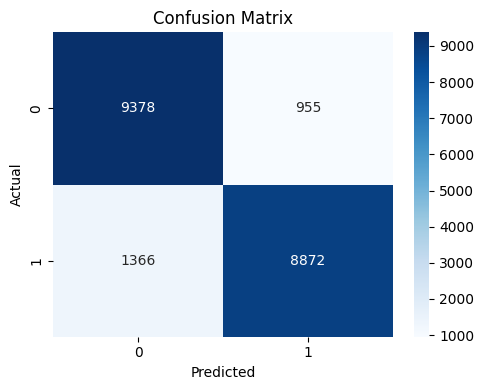

In [ ]:
print("Train Performance:")
train_metrics_nb = calculate_performance(y_train, y_train_pred, show_plot=True)


print("\nTest Performance:")
test_metrics_nb = calculate_performance(y_test, y_test_pred, show_plot=True)

**Naive Bayes**

 Điểm mạnh

- Thời gian huấn luyện nhanh nhất trong tất cả các mô hình, chỉ mất khoảng 2 phút để tìm ra bộ tham số tối ưu.
- Hiệu suất huấn luyện khá tốt: Trên tập train, mô hình đạt các chỉ số Accuracy, Precision, Recall và F1-score ở mức xấp xỉ 0.95, cho thấy khả năng học tập hiệu quả trên dữ liệu huấn luyện.


 Điểm yếu


- Hiệu suất trên tập test thấp nhất so với các mô hình còn lại, với các chỉ số Accuracy, Precision, Recall, và F1-score chỉ đạt khoảng 0.89.

### 3. SVM

Pipeline và Dữ liệu
- **Dữ liệu sử dụng**: tập tin văn bản (`text`) đã được làm sạch.
- **Xử lý đặc trưng**:
  - **TF-IDF (Term Frequency - Inverse Document Frequency)**: chuyển văn bản thành vector đặc trưng thưa, đại diện cho mức độ quan trọng của từ trong văn bản.
  - **Truncated SVD**: giảm chiều TF-IDF giúp giảm độ phức tạp và cải thiện hiệu suất.
- **Mô hình phân loại**: `LinearSVC` – SVM tuyến tính dùng để phân loại nhị phân tin **FAKE** (0) và **TRUE** (1).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import uniform

import pandas as pd
import numpy as np

In [ ]:
file_path = "/kaggle/input/dataset/cleaned_data.csv"
df  = pd.read_csv(file_path)
display(df.head())

,text,label
0,The head of a conservative Republican faction ...,0
1,Transgender people will be allowed for the fir...,0
2,The special counsel investigation of links bet...,0
3,Trump campaign adviser George Papadopoulos tol...,0
4,President Donald Trump called on the U.S. Post...,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5, ngram_range=(1,2))),
    ('svd', TruncatedSVD(n_iter=7, random_state=42)),
    ('clf', LinearSVC())
])

param_dist = {
    'tfidf__max_df': [0.75, 0.9],
    'tfidf__min_df': [3, 5],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'svd__n_components': [100, 200, 300],
    'clf__C': uniform(0.1, 10)
}

print("Random Search for HyperParameters\n")

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10,  # Early stopping logic: fewer trials
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

print("Train SVM with Best HyperParameters")

search.fit(X_train, y_train)

Random Search for HyperParameters

Train SVM with Best HyperParameters
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END clf__C=3.845401188473625, svd__n_components=100, tfidf__max_df=0.75, tfidf__min_df=3, tfidf__ngram_range=(1, 2); total time=   0.0s
[CV] END clf__C=0.6808361216819946, svd__n_components=100, tfidf__max_df=0.9, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time=   0.0s
[CV] END clf__C=6.608884729488528, svd__n_components=100, tfidf__max_df=0.9, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time=   0.0s
[CV] END clf__C=9.485527090157502, svd__n_components=200, tfidf__max_df=0.9, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__C=0.33062425041415755, svd__n_components=300, tfidf__max_df=0.75, tfidf__min_df=3, tfidf__ngram_range=(1, 2); total time=   0.0s
[CV] END clf__C=0.5666566321361542, svd__n_components=300, tfidf__max_df=0.9, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=   0.0s
[CV] END clf__C=6.2838

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('tfidf',
                                              TfidfVectorizer(max_df=0.9,
                                                              min_df=5,
                                                              ngram_range=(1,
                                                                           2),
                                                              stop_words='english')),
                                             ('svd',
                                              TruncatedSVD(n_iter=7,
                                                           random_state=42)),
                                             ('clf', LinearSVC())]),
                   n_jobs=-1,
                   param_distributions={'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e5b2d76fa10>,
                                        'svd__n_components': [100, 200, 300],
                                        'tfidf__max_df': [0.75, 0.9],
                                        'tfidf__min_df': [3, 5],
                                        'tfidf__ngram_range': [(1, 1), (1, 2)]},
                   random_state=42, scoring='f1_macro', verbose=2)

In [ ]:
best_model = search.best_estimator_
y_test_pred = best_model.predict(X_test)


Test Performance:
Accuracy: 0.9177
Precision: 0.9153
Recall: 0.9196
F1-score: 0.9175

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10333
           1       0.92      0.92      0.92     10238

    accuracy                           0.92     20571
   macro avg       0.92      0.92      0.92     20571
weighted avg       0.92      0.92      0.92     20571



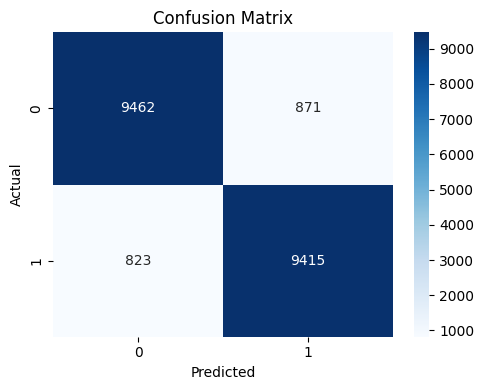

In [ ]:
print("\nTest Performance:")
test_metrics_svm = calculate_performance(y_test, y_test_pred, show_plot=True)

**SVM (Support Vector Machine)**

**Điểm mạnh**

- Hoạt động tốt với dữ liệu có số chiều lớn, đặc biệt là dữ liệu văn bản sau khi vector hóa bằng TF-IDF.
- Mô hình tuyến tính như LinearSVM có tốc độ huấn luyện nhanh, thích hợp với tập dữ liệu lớn (~70,000 mẫu).
- Cân bằng tốt giữa hiệu suất và tốc độ, đạt F1-score lên đến ~0.92 trên tập test, chỉ thấp hơn so với các mô hình pretrained như XLNet, DeBERTa.
- Có thể dễ dàng mở rộng với kernel phi tuyến tính nếu cần mô hình hóa các mối quan hệ phức tạp hơn.

**Điểm yếu**

- LinearSVM chỉ phù hợp khi dữ liệu có thể phân tách tuyến tính tốt — nếu không, cần sử dụng kernel phức tạp hơn, làm tăng chi phí tính toán.
- Không tự động trích xuất đặc trưng như các mô hình deep learning nên phụ thuộc hoàn toàn vào chất lượng biểu diễn đầu vào (TF-IDF).
- Không hỗ trợ "early stopping" trong huấn luyện vì không phải là mô hình huấn luyện theo epoch như neural networks.
- Hiệu suất có thể kém hơn trên các văn bản ngắn, nhiễu hoặc có thông tin ngữ cảnh sâu mà TF-IDF không thể nắm bắt.

**Kết luận**

SVM là một lựa chọn mạnh mẽ, hiệu quả và dễ triển khai cho bài toán phân loại tin thật/giả, đặc biệt khi cần mô hình nhanh, đơn giản mà vẫn đạt hiệu suất cao. Tuy nhiên, để bắt được thông tin ngữ cảnh phức tạp hơn, có thể cân nhắc các mô hình deep learning như BERT hoặc XLNet.


## Model RNN

Với mô hình **LSTM**, dữ liệu đầu vào cần được biểu diễn dưới dạng **tensor 3 chiều** với kích thước: (batch_size, sequence_length, embedding_dim)

**Các bước xử lý:**
- Văn bản được **token hóa** và **chuẩn hóa độ dài** về một độ dài cố định (bằng cách padding hoặc cắt bớt).
- Sau đó, các từ được **vector hóa** bằng phương pháp **Word2Vec**, với **kích thước embedding là 100**.




### LSTM

In [ ]:
from typing import List, Tuple, Optional, Dict

In [ ]:
def prepare_tokenizer(texts, oov_token="<OOV>"):
    tokenizer = Tokenizer(oov_token=oov_token)
    tokenizer.fit_on_texts(texts)
    print("Vocabulary size:", len(tokenizer.word_index))
    return tokenizer


def texts_to_sequences(texts, tokenizer):
    return tokenizer.texts_to_sequences(texts)


def pad_text_sequences(sequences, maxlen=100, padding='post', truncating='post'):
    return pad_sequences(sequences, maxlen=maxlen, padding=padding, truncating=truncating)


def train_word2vec(texts, embedding_dim=100):
    tokenized = [text.split() for text in texts]
    model = Word2Vec(sentences=tokenized, vector_size=embedding_dim, window=5, min_count=1)
    return model


def build_embedding_matrix(tokenizer, w2v_model, embedding_dim):
    vocab_size = len(tokenizer.word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in tokenizer.word_index.items():
        if word in w2v_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]
    return embedding_matrix


def build_lstm_model(vocab_size, embedding_dim, maxlen, embedding_matrix):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=maxlen,
                        trainable=False))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



def train_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stop])
    return model, history


def performance_history(history):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history.get('accuracy', history.history.get('acc')))
    plt.plot(history.history.get('val_accuracy', history.history.get('val_acc')))
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.plot(history.history.get('loss'))
    plt.plot(history.history.get('val_loss'))
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def model_evaluation(model, X_test, y_test):
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
    return score

In [ ]:
texts = df['text'].astype(str).tolist()
labels = df['label'].values

tokenizer = prepare_tokenizer(texts)
sequences = texts_to_sequences(texts, tokenizer)
padded = pad_text_sequences(sequences, maxlen=100)

X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.3, stratify=labels, random_state=42)

w2v_model = train_word2vec(texts, embedding_dim=100)
embedding_matrix = build_embedding_matrix(tokenizer, w2v_model, embedding_dim=100)

Vocabulary size: 295627


I0000 00:00:1750214943.509822      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750214943.510600      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │      29,562,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,562,800 (112.77 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 29,562,800 (112.77 MB)

None
Epoch 1/20


I0000 00:00:1750214950.828547     140 cuda_dnn.cc:529] Loaded cuDNN version 90300


600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.7689 - loss: 0.4848 - val_accuracy: 0.8920 - val_loss: 0.2769
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8940 - loss: 0.2653 - val_accuracy: 0.9233 - val_loss: 0.2190
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9228 - loss: 0.1972 - val_accuracy: 0.9314 - val_loss: 0.1881
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9401 - loss: 0.1622 - val_accuracy: 0.9287 - val_loss: 0.1779
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9495 - loss: 0.1350 - val_accuracy: 0.9398 - val_loss: 0.1630
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9585 - loss: 0.1175 - val_accuracy: 0.9353 - val_loss: 0.1817
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9650 - loss: 0.1004 - val_accuracy: 0.9415 - val_loss: 0.1557
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9721 - loss: 0.0811 - val_accuracy: 0.94

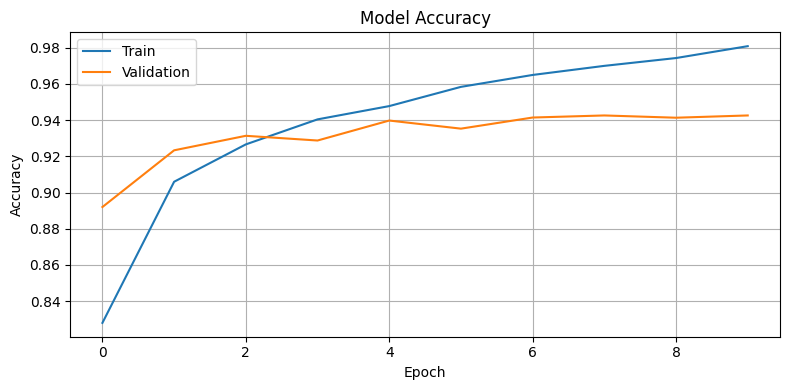

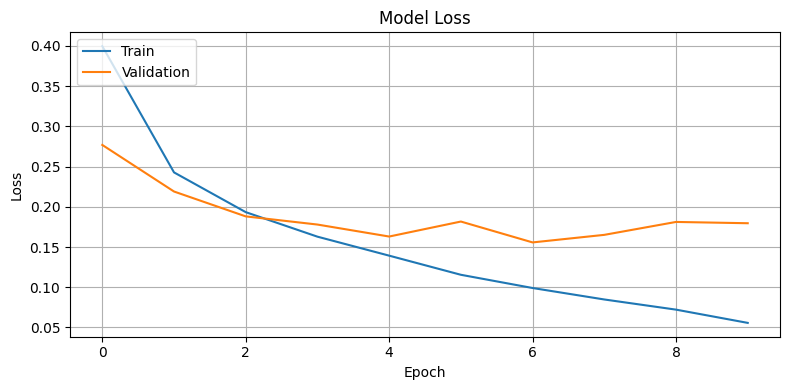

Test loss: 0.15894964337348938 / Test accuracy: 0.9446793794631958


[0.15894964337348938, 0.9446793794631958]

In [ ]:
model_lstm = build_lstm_model(len(tokenizer.word_index) + 1, 100, 100, embedding_matrix)
model_lstm, history = train_model(model_lstm, X_train, y_train, X_test, y_test, epochs = 20, batch_size=64)

performance_history(history)
model_evaluation(model_lstm, X_test, y_test)

In [ ]:
y_train_pred = model_lstm.predict(X_train)
y_test_pred = model_lstm.predict(X_test)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
643/643 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [ ]:
y_train_pred = np.where(y_train_pred > 0.5, 1, 0)
y_test_pred = np.where(y_test_pred > 0.5, 1, 0)

Train Performance:
Accuracy: 0.9702
Precision: 0.9642
Recall: 0.9762
F1-score: 0.9702

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     24165
           1       0.96      0.98      0.97     23831

    accuracy                           0.97     47996
   macro avg       0.97      0.97      0.97     47996
weighted avg       0.97      0.97      0.97     47996



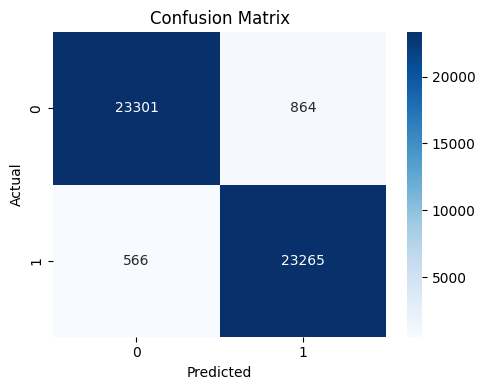


Test Performance:
Accuracy: 0.9447
Precision: 0.9372
Recall: 0.9524
F1-score: 0.9447

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10357
           1       0.94      0.95      0.94     10214

    accuracy                           0.94     20571
   macro avg       0.94      0.94      0.94     20571
weighted avg       0.94      0.94      0.94     20571



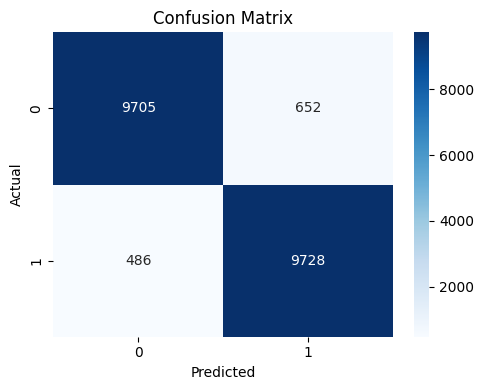

In [ ]:
print("Train Performance:")
train_metrics_lstm = calculate_performance(y_train, y_train_pred, show_plot=True)


print("\nTest Performance:")
test_metrics_lstm = calculate_performance(y_test, y_test_pred, show_plot=True)

**LSTM**:

 Điểm mạnh

- Thời gian huấn luyện tương đối nhanh, không mất quá nhiều thời gian so với các mô hình deep learning phức tạp hơn.
- Hiệu suất huấn luyện tốt: Các chỉ số Accuracy, Precision, Recall và F1-score trên tập train đều đạt khoảng 0.97, cho thấy mô hình học rất hiệu quả.
- Hiệu suất kiểm tra cao: Trên tập test, mô hình duy trì kết quả ổn định với các chỉ số khoảng 0.94 cho cả 4 thước đo, phản ánh khả năng tổng quát hóa tốt.


 Điểm yếu


- Tỷ lệ nhầm lẫn vẫn đáng kể: Tương tự như mô hình Logistic Regression, LSTM vẫn mắc sai sót với khoảng 6% dữ liệu bị phân loại sai ở cả hai lớp. Khi triển khai trong môi trường thực tế với quy mô lớn, tỷ lệ này vẫn có thể gây ảnh hưởng đến hiệu quả toàn hệ thống.
- Thiếu tính diễn giải: Không giống như mô hình Logistic Regression, mô hình LSTM là một mạng nơ-ron sâu hoạt động như một "hộp đen", do đó rất khó giải thích vì sao mô hình lại đưa ra một dự đoán cụ thể nào đó.

## Model Transformer-based

Đối với các mô hình hiện đại như BERT, XLNet, RoBERTa, v.v., văn bản đầu vào không nên được làm sạch quá kỹ lưỡng. Các mô hình này đã được huấn luyện trước (pre-trained) trên văn bản với đầy đủ dấu câu, chữ hoa, từ viết tắt, ký tự đặc biệt,...

Việc clean quá kỹ, có thể **làm mất đi ngữ cảnh và thông tin quan trọng** mà các mô hình pre-trained có khả năng tận dụng để hiểu sâu sắc hơn về ngữ nghĩa văn bản.



### 1. DistilBert

Input đầu vào của mô hình `distilbert-base-uncased` gồm:
- input_ids: mã hóa các từ thành ID theo vocab của DistilBERT
- attention_mask: đánh dấu vị trí nào là token thật (1) và padding (0)

In [ ]:
SEED        = 42
MODEL_NAME  = "distilbert-base-uncased"
BATCH_TRAIN = 16
BATCH_EVAL  = 32
EPOCHS      = 3
LR          = 2e-5
MAX_LEN     = 512
DEVICE      = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

In [ ]:
html_pattern = re.compile(r"<.*?>")
url_pattern  = re.compile(r"https?://\S+|www\.\S+")

def clean_text_for_bert(txt: str) -> str:
    txt = re.sub(html_pattern, " ", txt)
    txt = re.sub(url_pattern , " [URL] ", txt)
    txt = txt.replace("\u2019", "'").strip()
    return txt

In [ ]:
df["clean_text2"] = df["text"].astype(str).apply(clean_text_for_bert)

In [ ]:
test_ratio = 0.15
val_ratio  = 0.15
val_size_rel = val_ratio / (1 - test_ratio)
core_cols = df[["clean_text2", "label"]]
train_df, test_df = train_test_split(core_cols,
                                     test_size=0.15,
                                     stratify=core_cols.label,
                                     random_state=SEED)
train_df, val_df  = train_test_split(train_df,
                                     test_size=val_size_rel,
                                     stratify=train_df.label,
                                     random_state=SEED)
ds_dict = DatasetDict({
    split: Dataset.from_pandas(d.reset_index(drop=True))
    for split, d in [("train", train_df), ("validation", val_df), ("test", test_df)]
})

In [ ]:
tok = AutoTokenizer.from_pretrained(MODEL_NAME)
if "xlnet" in MODEL_NAME.lower():
    tok.padding_side = "left"
    if tok.pad_token is None:
        tok.pad_token = tok.eos_token

def tok_fn(batch):
    return tok(batch["clean_text2"], truncation=True, max_length=MAX_LEN)

tokenized = ds_dict.map(tok_fn, batched=True, remove_columns=["clean_text2"])
collate   = DataCollatorWithPadding(tok, pad_to_multiple_of=8)
train_dl  = DataLoader(tokenized["train"],      batch_size=BATCH_TRAIN,
                       shuffle=True,  pin_memory=True, collate_fn=collate)
val_dl    = DataLoader(tokenized["validation"], batch_size=BATCH_EVAL,
                       pin_memory=True, collate_fn=collate)
test_dl   = DataLoader(tokenized["test"],       batch_size=BATCH_EVAL,
                       pin_memory=True, collate_fn=collate)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/47996 [00:00<?, ? examples/s]

Map:   0%|          | 0/10285 [00:00<?, ? examples/s]

Map:   0%|          | 0/10286 [00:00<?, ? examples/s]

In [ ]:
model_bert  = AutoModelForSequenceClassification.from_pretrained(
            MODEL_NAME, num_labels=2).to(DEVICE)
opt    = AdamW(model_bert.parameters(), lr=LR)
scaler = GradScaler()
sched  = get_scheduler("linear", opt, 0, EPOCHS * len(train_dl))

model_bert.train()
for ep in range(EPOCHS):
    loop = tqdm(train_dl, desc=f"Epoch {ep+1}/{EPOCHS}")
    for batch in loop:
        batch = {k:v.to(DEVICE) for k,v in batch.items()}
        with autocast():
            loss = model_bert(**batch).loss
        scaler.scale(loss).backward()
        scaler.step(opt); scaler.update(); opt.zero_grad(); sched.step()
        loop.set_postfix(loss=loss.item())

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 3/3: 100%|██████████| 3000/3000 [10:15<00:00,  4.88it/s, loss=9.47e-5] 


In [ ]:
def get_preds(model, loader):
    model.eval()
    y_true, y_pred = [], []
    for b in loader:
        b = {k:v.to(DEVICE) for k,v in b.items()}
        logits = model(**b).logits
        y_pred.extend(torch.argmax(logits,-1).cpu().tolist())
        y_true.extend(b["labels"].cpu().tolist())
    return y_true, y_pred

Accuracy: 0.9997
Precision: 0.9998
Recall: 0.9997
F1-score: 0.9997

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24165
           1       1.00      1.00      1.00     23831

    accuracy                           1.00     47996
   macro avg       1.00      1.00      1.00     47996
weighted avg       1.00      1.00      1.00     47996



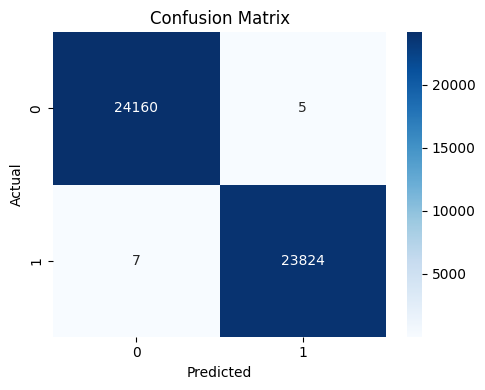

{'accuracy': 0.9997, 'precision': 0.9998, 'recall': 0.9997, 'f1_score': 0.9997}


In [ ]:
y_train_true, y_train_pred = get_preds(model_bert, train_dl)
train_metrics = calculate_performance(y_train_true, y_train_pred, show_plot=True)
print(train_metrics)

Accuracy: 0.9927
Precision: 0.9963
Recall: 0.989
F1-score: 0.9926

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5178
           1       1.00      0.99      0.99      5107

    accuracy                           0.99     10285
   macro avg       0.99      0.99      0.99     10285
weighted avg       0.99      0.99      0.99     10285



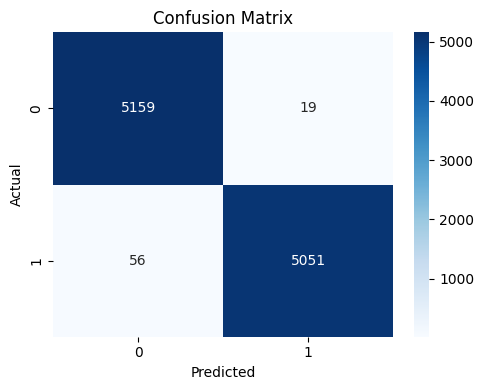

{'accuracy': 0.9927, 'precision': 0.9963, 'recall': 0.989, 'f1_score': 0.9926}


In [ ]:
y_val_true, y_val_pred = get_preds(model_bert, val_dl)
val_metrics = calculate_performance(y_val_true, y_val_pred, show_plot=True)
print(val_metrics)

Accuracy: 0.991
Precision: 0.9935
Recall: 0.9883
F1-score: 0.9909

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5179
           1       0.99      0.99      0.99      5107

    accuracy                           0.99     10286
   macro avg       0.99      0.99      0.99     10286
weighted avg       0.99      0.99      0.99     10286



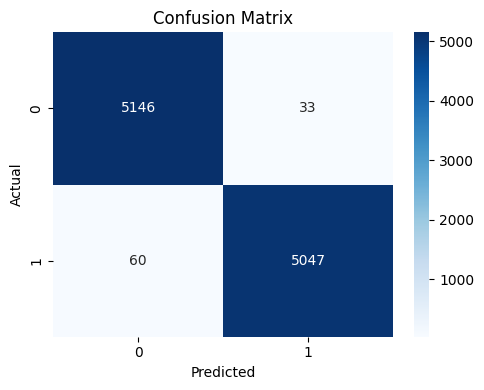

In [ ]:
y_test_true, y_test_pred = get_preds(model_bert, test_dl)
test_metrics = calculate_performance(y_test_true, y_test_pred)

**Distilbert-base-uncased**

 Điểm mạnh

- Hiệu suất huấn luyện vượt trội: Mô hình học rất tốt trên tập huấn luyện, với chỉ khoảng 12 mẫu bị phân loại sai trên cả hai lớp — một con số rất nhỏ so với tổng thể. Các chỉ số Accuracy, Precision, Recall, và F1-score đều gần như đạt mức tuyệt đối (≈ 1.0).
- Khả năng tổng quát hóa tốt: Trên tập kiểm tra, mô hình tiếp tục duy trì hiệu suất cao với tất cả các chỉ số đánh giá đều xấp xỉ 0.99, cho thấy năng lực phân loại mạnh mẽ và ổn định.
- Lợi thế từ pre-trained BERT: Kết quả cho thấy mô hình Transformer như DistilBERT có khả năng hiểu ngữ cảnh và biểu diễn ngôn ngữ ở mức sâu, giúp cải thiện rõ rệt hiệu quả phân loại.


 Điểm yếu


- Thời gian huấn luyện rất lâu: Mô hình mất hơn 1 giờ để hoàn thành quá trình training, cao hơn đáng kể so với các mô hình truyền thống.
- Dự đoán chậm trên tập test: Thời gian inference cũng khá dài, mất khoảng 10 phút để thực hiện dự đoán cho toàn bộ tập test.
- Thiếu tính diễn giải: Tương tự các mô hình deep learning khác, DistilBERT là một mô hình "hộp đen" (black-box), nên rất khó lý giải tại sao một dự đoán cụ thể được đưa ra, điều này làm giảm tính minh bạch khi triển khai trong các hệ thống cần giải thích kết quả.

### XLNET + DEBERTA

#### Tổng quan

**Yêu cầu đầu vào của mô hình:**
- Mỗi văn bản đầu vào cần được chuyển thành các **chuỗi số nguyên** (token IDs) đại diện cho từng từ hoặc subword.
- Mô hình transformer như **DeBERTa** và **XLNet** yêu cầu đầu vào bao gồm:
  - `input_ids`: Mã hóa của chuỗi văn bản sau tokenization.
  - `attention_mask`: Thể hiện vị trí token thực tế (1) và padding (0).
  - `token_type_ids`: (nếu cần) chỉ dùng với một số mô hình như BERT hoặc XLNet.

**Quy trình xử lý mình áp dụng:**
1. **Tải dữ liệu** từ hai file `DataSet_Misinfo_TRUE.csv` và `DataSet_Misinfo_FAKE.csv`, đồng thời gán nhãn `label = 1` cho tin thật và `label = 0` cho tin giả.
2. **Tiền xử lý văn bản**:
   - Loại bỏ thẻ HTML, đường dẫn URL.
   - Chuyển chữ thường, xóa khoảng trắng dư thừa.
3. **Chia tập dữ liệu** thành train / validation / test theo tỷ lệ 80/10/10 và đảm bảo cân bằng nhãn (stratified split).
4. **Token hóa** bằng tokenizer của mô hình tương ứng (DeBERTa hoặc XLNet):
   - Áp dụng `truncation`, `padding`, `max_length = 512`.
   - Lưu lại các trường `input_ids`, `attention_mask`, và `token_type_ids` (nếu có) trong DataFrame.
5. **Chuyển thành Tensor Dataset** để đưa vào mô hình huấn luyện.


In [ ]:
!pip install torchinfo

In [ ]:
import logging
import re
from collections import Counter

import pandas as pd
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from torch.cuda.amp import GradScaler, autocast
from torch.nn.utils import clip_grad_norm_
from torch.optim import AdamW
from torch.utils.data import DataLoader, Dataset
from torchinfo import summary
from tqdm import tqdm
from transformers import AutoTokenizer, DebertaV2Model, DebertaV2Tokenizer, XLNetModel
import torch
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import pandas as pd
import os

In [ ]:
def setup_logger(log_path='training.log'):
    logger = logging.getLogger("trainer_logger")
    logger.setLevel(logging.INFO)

    # Console handler
    ch = logging.StreamHandler()
    ch.setLevel(logging.INFO)

    # File handler
    fh = logging.FileHandler(log_path, mode='w')
    fh.setLevel(logging.INFO)

    # Formatter
    formatter = logging.Formatter('%(asctime)s - %(message)s')
    ch.setFormatter(formatter)
    fh.setFormatter(formatter)

    # Add handlers (prevent duplicates)
    if not logger.handlers:
        logger.addHandler(ch)
        logger.addHandler(fh)

    return logger

In [ ]:
class LoadAndDiscoverDataset:
    def __init__(self, true_path, fake_path, text_column="text", label_column="label", test_size=0.1, val_size=0.1, seed=42):
        self.true_path = true_path
        self.fake_path = fake_path
        self.text_column = text_column
        self.label_column = label_column
        self.test_size = test_size
        self.val_size = val_size
        self.seed = seed

        self.dataset = self._load_and_prepare()

    def _load_and_prepare(self):
        print("Loading CSV files...")
        df_true = pd.read_csv(self.true_path)
        df_true[self.label_column] = 1

        df_fake = pd.read_csv(self.fake_path)
        df_fake[self.label_column] = 0

        df_all = pd.concat([df_true, df_fake]).reset_index(drop=True)
        df_all = df_all.dropna(subset=[self.text_column])

        # Split train+val/test
        train_val, test = train_test_split(df_all, test_size=self.test_size, random_state=self.seed, stratify=df_all[self.label_column])

        # Further split train/val
        val_fraction = self.val_size / (1 - self.test_size)
        train, val = train_test_split(train_val, test_size=val_fraction, random_state=self.seed, stratify=train_val[self.label_column])

        print(f"Total samples: {len(df_all)} | Train: {len(train)} | Val: {len(val)} | Test: {len(test)}")

        return {"train": train.reset_index(drop=True), "val": val.reset_index(drop=True), "test": test.reset_index(drop=True)}

    def get_split(self, split_name: str):
        if split_name not in self.dataset:
            raise ValueError(f"Split '{split_name}' not found. Choose from {list(self.dataset.keys())}")
        return self.dataset[split_name]

    def get_all_splits(self):
        return self.dataset

    def discover(self):
        print("\nDataset Overview")
        for split, data in self.dataset.items():
            print(f"\nSplit: {split}")
            print(f"Samples: {len(data)}")

            print("\nSample entries:")
            for i in range(min(2, len(data))):
                print(f"  [{i}] {data.iloc[i][self.text_column][:100]}... | Label: {data.iloc[i][self.label_column]}")

            label_counts = Counter(data[self.label_column])
            print(f"Label distribution: {dict(label_counts)}")

class Preprocessor:
    def __init__(self, lowercase=True, strip_whitespace=True, remove_urls=True, remove_html=True):
        self.lowercase = lowercase
        self.strip_whitespace = strip_whitespace
        self.remove_urls = remove_urls
        self.remove_html = remove_html

    def preprocess_text(self, text: str) -> str:
        if self.lowercase:
            text = text.lower()
        if self.strip_whitespace:
            text = text.strip()
        if self.remove_html:
            text = re.sub(r'<.*?>', '', text)
        if self.remove_urls:
            text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        return text

    def apply(self, df: pd.DataFrame, text_column='text') -> pd.DataFrame:
        print(f"Applying preprocessing to column: '{text_column}'...")
        df = df.copy()
        df[text_column] = df[text_column].astype(str).apply(self.preprocess_text)
        return df

class TokenizerWrapper:
    def __init__(self, model_name='bert-base-uncased', max_length=512):
        self.model_name = model_name
        self.max_length = max_length
        if "deberta" in model_name.lower():
            self.tokenizer = DebertaV2Tokenizer.from_pretrained(model_name)
        else:
            self.tokenizer = AutoTokenizer.from_pretrained(model_name)


    def tokenize_dataframe(self, df, text_column='text'):
        print(f"Tokenizing {len(df)} samples with: {self.model_name}")
        tokens = self.tokenizer(
            df[text_column].tolist(),
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors=None  # we keep it in raw list form to align with df
        )

        # Add token columns back to the DataFrame
        df = df.copy()
        df['input_ids'] = tokens['input_ids']
        df['attention_mask'] = tokens['attention_mask']

        if 'token_type_ids' in tokens:
            df['token_type_ids'] = tokens['token_type_ids']  # XLNet / BERT

        return df

class CustomDatasetWrapper(Dataset):
    def __init__(self, df, label_column='label'):
        self.df = df.reset_index(drop=True)
        self.label_column = label_column

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        item = {
            'input_ids': torch.tensor(self.df.loc[idx, 'input_ids'], dtype=torch.long),
            'attention_mask': torch.tensor(self.df.loc[idx, 'attention_mask'], dtype=torch.long),
            'labels': torch.tensor(self.df.loc[idx, self.label_column], dtype=torch.long)
        }
        if 'token_type_ids' in self.df.columns:
            item['token_type_ids'] = torch.tensor(self.df.loc[idx, 'token_type_ids'], dtype=torch.long)
        return item

class DataLoaderBuilder:
    def __init__(self, batch_size=8):
        self.batch_size = batch_size

    def create(self, train_df, val_df=None, label_column='label'):
        print("Building DataLoaders...")

        train_loader = DataLoader(CustomDatasetWrapper(train_df, label_column), batch_size=self.batch_size, shuffle=True)
        val_loader = None

        if val_df is not None:
            val_loader = DataLoader(CustomDatasetWrapper(val_df, label_column), batch_size=self.batch_size, shuffle=False)

        return train_loader, val_loader

class CustomDebertaClassifier(nn.Module):
    def __init__(self, model_name='microsoft/deberta-v3-base', num_labels=2):
        super().__init__()
        self.encoder = DebertaV2Model.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.encoder.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask, token_type_ids=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        pooled = outputs.last_hidden_state[:, 0]  # [CLS]
        pooled = self.dropout(pooled)
        return self.classifier(pooled)

class CustomXLNetClassifier(nn.Module):
    def __init__(self, model_name='xlnet-base-cased', num_labels=2):
        super().__init__()
        self.encoder = XLNetModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.encoder.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask, token_type_ids=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled = outputs.last_hidden_state[:, -1]  # last token
        pooled = self.dropout(pooled)
        return self.classifier(pooled)

class ModelBuilder:
    def __init__(self, model_name="microsoft/deberta-v3-base", num_labels=2, device=None):
        self.model_name = model_name
        self.num_labels = num_labels
        self.device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        self.model = self._build_model()

    def _build_model(self):
        print(f"Loading custom model for: {self.model_name}")
        if "deberta" in self.model_name:
            model = CustomDebertaClassifier(model_name=self.model_name, num_labels=self.num_labels)
        elif "xlnet" in self.model_name:
            model = CustomXLNetClassifier(model_name=self.model_name, num_labels=self.num_labels)
        else:
            raise ValueError("Only DeBERTa and XLNet are supported in custom mode.")
        return model.to(self.device)

    def get_model(self):
        return self.model

    def get_device(self):
        return self.device

class TrainingConfig:
    def __init__(
        self,
        learning_rate=2e-5,
        batch_size=8,
        epochs=3,
        weight_decay=0.01,
        num_labels=2,  # default binary
        loss_fn='cross_entropy',  # or 'bce'
        max_grad_norm=1.0,
        grad_accum_steps=1  # NEW: gradient accumulation
    ):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.weight_decay = weight_decay
        self.num_labels = num_labels
        self.loss_fn = loss_fn
        self.max_grad_norm = max_grad_norm
        self.grad_accum_steps = grad_accum_steps  # store it

class TrainingWorkflow:
    def __init__(self, trainer, evaluator=None, save_best=False, save_path="best_model.pt",
                 early_stopping_patience=3, early_stopping_delta=1e-4, logger=None):
        self.trainer = trainer
        self.evaluator = evaluator
        self.save_best = save_best
        self.save_path = save_path
        self.best_accuracy = 0.0
        self.early_stopping_patience = early_stopping_patience
        self.early_stopping_delta = early_stopping_delta
        self.no_improve_epochs = 0
        self.logger = logger or print  # fallback to print if logger is not provided

    def run(self):
        self.logger.info("Starting training workflow...")

        for epoch in range(self.trainer.config.epochs):
            self.logger.info(f"\nEpoch {epoch + 1}/{self.trainer.config.epochs}")
            self.trainer.train_epoch(logger=self.logger)

            if self.evaluator:
                accuracy = self.evaluator.evaluate()
                self.logger.info(f"Validation Accuracy: {accuracy:.4f}")

                if accuracy > self.best_accuracy + self.early_stopping_delta:
                    self.best_accuracy = accuracy
                    self.no_improve_epochs = 0
                    if self.save_best:
                        self._save_model()
                        self.logger.info(f"Best model saved with accuracy: {accuracy:.4f}")
                else:
                    self.no_improve_epochs += 1
                    self.logger.info(f"No improvement for {self.no_improve_epochs} epoch(s).")

                if self.no_improve_epochs >= self.early_stopping_patience:
                    self.logger.info(f"Early stopping triggered after {epoch + 1} epochs.")
                    break

        self.logger.info("Training complete.")

    def _save_model(self):
        torch.save(self.trainer.model.state_dict(), self.save_path)

class Trainer:
    def __init__(self, model, train_loader, config, device):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.config = config
        self.device = device

        self.optimizer = AdamW(
            self.model.parameters(),
            lr=self.config.learning_rate,
            weight_decay=self.config.weight_decay
        )

        self.grad_accum_steps = getattr(self.config, 'grad_accum_steps', 1)
        self.max_grad_norm = getattr(self.config, 'max_grad_norm', 1.0)
        self.scaler = GradScaler()

        if config.loss_fn == 'cross_entropy':
            self.criterion = nn.CrossEntropyLoss()
        elif config.loss_fn == 'bce':
            self.criterion = nn.BCEWithLogitsLoss()
        else:
            raise ValueError("Unsupported loss function")

    def train_epoch(self, logger=None):
      self.model.train()
      total_loss = 0.0
      step = 0
      logger = logger or print

      progress_bar = tqdm(self.train_loader, desc="Training", leave=False)

      for batch_idx, batch in enumerate(progress_bar):
          input_ids = batch['input_ids'].to(self.device)
          attention_mask = batch['attention_mask'].to(self.device)
          labels = batch['labels'].to(self.device)

          if self.config.num_labels > 1 and self.config.loss_fn == 'cross_entropy':
              labels = labels.long()
          else:
              labels = labels.float().unsqueeze(1)

          with autocast():
              outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
              logits = outputs
              loss = self.criterion(logits, labels)
              loss = loss / self.grad_accum_steps

          self.scaler.scale(loss).backward()
          step += 1

          if step % self.grad_accum_steps == 0:
              clip_grad_norm_(self.model.parameters(), self.max_grad_norm)
              self.scaler.step(self.optimizer)
              self.scaler.update()
              self.optimizer.zero_grad()

          total_loss += loss.item() * self.grad_accum_steps
          avg_loss = total_loss / (batch_idx + 1)
          progress_bar.set_postfix(loss=avg_loss)

      final_avg_loss = total_loss / len(self.train_loader)
      logger.info(f"Avg Training Loss: {final_avg_loss:.4f}")

class Evaluator:
    def __init__(self, model, dataloader, device, loss_fn='cross_entropy'):
        self.model = model.to(device)
        self.dataloader = dataloader
        self.device = device
        self.loss_fn = loss_fn

    def evaluate(self, return_preds=False):
        self.model.eval()
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for batch in self.dataloader:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
                logits = outputs if isinstance(outputs, torch.Tensor) else outputs.logits

                if self.loss_fn == 'cross_entropy':
                    preds = torch.argmax(logits, dim=1)
                    labels = labels.long()
                elif self.loss_fn == 'bce':
                    preds = (torch.sigmoid(logits) > 0.5).int()
                    labels = labels.int()
                else:
                    raise ValueError(f"Unsupported loss function: {self.loss_fn}")

                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        print(f"Evaluation Accuracy: {acc:.4f}")

        if return_preds:
            return acc, all_preds, all_labels
        return acc

class Inferencer:
    def __init__(self, model, tokenizer, device, threshold=0.5):
        self.model = model.to(device)
        self.tokenizer = tokenizer
        self.device = device
        self.threshold = threshold

    def predict(self, texts):
        self.model.eval()
        if isinstance(texts, str):
            texts = [texts]

        inputs = self.tokenizer(
            texts,
            padding=True,
            truncation=True,
            max_length=512,
            return_tensors="pt"
        ).to(self.device)

        with torch.no_grad():
            outputs = self.model(**inputs)
            logits = outputs

            if logits.size(1) == 2:  # CrossEntropy
                preds = torch.argmax(logits, dim=1).cpu().numpy()
            else:  # BCE
                probs = torch.sigmoid(logits).squeeze().cpu().numpy()
                preds = (probs > self.threshold).astype(int)

        return preds

In [ ]:
def main():
    print("Running train_model.py...")

    # === 1. Load and explore the dataset ===
    dataset_loader = LoadAndDiscoverDataset(
        true_path=TRUE_DATASET_PATH,
        fake_path=FAKE_DATASET_PATH
    )
    dataset_loader.discover()
    splits = dataset_loader.get_all_splits()

    train_df = splits["train"]
    val_df = splits["val"]
    test_df = splits["test"]

    # === 2. Preprocess text once ===
    preprocessor = Preprocessor()
    train_df = preprocessor.apply(train_df)
    val_df = preprocessor.apply(val_df)
    test_df = preprocessor.apply(test_df)

    # === 3. Train both models ===
    for model_name in ["microsoft/deberta-v3-base", "xlnet-base-cased"]:
        print(f"\n--- Training {model_name} ---\n")

        # Tokenizer
        tokenizer = TokenizerWrapper(model_name)
        train_df_tok = tokenizer.tokenize_dataframe(train_df)
        val_df_tok = tokenizer.tokenize_dataframe(val_df)
        test_df_tok = tokenizer.tokenize_dataframe(test_df)

        # DataLoaders
        BATCH_SIZE = 32 if "deberta" in model_name else 64
        dataloader_builder = DataLoaderBuilder(batch_size=BATCH_SIZE)
        train_loader, val_loader = dataloader_builder.create(train_df_tok, val_df_tok)

        test_loader = DataLoader(
            CustomDatasetWrapper(test_df_tok),
            batch_size=BATCH_SIZE,
            shuffle=False
        )

        # Model
        model_builder = ModelBuilder(model_name=model_name, num_labels=2)
        model = model_builder.get_model()
        device = model_builder.get_device()

        print(model.classifier)
        print(f"Using device: {device}")

        # Training config
        config = TrainingConfig(
            learning_rate=2e-5,
            batch_size=BATCH_SIZE,
            epochs=5,
            num_labels=2,
            loss_fn='cross_entropy',
            weight_decay=0.01,
            max_grad_norm=1.0,
            grad_accum_steps=2
        )

        # Trainer & evaluator
        trainer = Trainer(model, train_loader, config, device)
        evaluator = Evaluator(model, val_loader, device)
        logger = setup_logger(f"training_log_{model_name.replace('/', '_')}.txt")

        workflow = TrainingWorkflow(
            trainer=trainer,
            evaluator=evaluator,
            save_best=True,
            early_stopping_patience=2,
            logger=logger,
            save_path=f"best_model_{model_name.replace('/', '_')}.pt"
        )

        # Train
        workflow.run()

        # Optionally evaluate on test set
        print(f"Loading best model for {model_name}...")
        model.load_state_dict(torch.load(f"best_model_{model_name.replace('/', '_')}.pt"))
        model.eval()
        test_eval = Evaluator(model, test_loader, device)
        test_acc = test_eval.evaluate()
        print(f"Test Accuracy for {model_name}: {test_acc:.4f}")

In [ ]:
def load_and_evaluate(model_path, model_builder, test_loader, device, loss_fn='cross_entropy', save_results=True, save_dir="results"):
    """
    Loads a trained model and evaluates it on the test set.
    Optionally saves the predictions and labels to disk.

    Parameters:
        model_path (str): Path to saved model (.pt file)
        model_builder: ModelBuilder instance to create model architecture
        test_loader (DataLoader): Test DataLoader
        device (torch.device): Device (CPU or GPU)
        loss_fn (str): 'cross_entropy' or 'bce'
        save_results (bool): Whether to save the predictions
        save_dir (str): Folder where results are saved
    """
    print(f"\nLoading model from: {model_path}")

    # Load model architecture and weights
    model = model_builder.get_model().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()

    # Evaluate using Evaluator class
    evaluator = Evaluator(model, test_loader, device, loss_fn=loss_fn)
    acc, preds, labels = evaluator.evaluate(return_preds=True)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(labels, preds, target_names=["FAKE", "TRUE"]))

    # Plot confusion matrix
    cm = confusion_matrix(labels, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["FAKE", "TRUE"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix (Accuracy: {acc:.2%})")
    plt.tight_layout()
    plt.show()

    # Save to CSV
    if save_results:
        os.makedirs(save_dir, exist_ok=True)
        model_tag = os.path.splitext(os.path.basename(model_path))[0]  # e.g., best_model_xlnet-base-cased
        out_path = os.path.join(save_dir, f"{model_tag}_predictions.csv")
        df_out = pd.DataFrame({
            "true_label": labels,
            "predicted_label": preds
        })
        df_out.to_csv(out_path, index=False)
        print(f"Predictions saved to: {out_path}")

    return acc, preds, labels

In [ ]:
# main()
TRUE_DATASET_PATH = "/kaggle/input/dataset/DataSet_Misinfo_TRUE.csv"
FAKE_DATASET_PATH = "/kaggle/input/dataset/DataSet_Misinfo_FAKE.csv"
# Example
dataset_loader = LoadAndDiscoverDataset(true_path = TRUE_DATASET_PATH, fake_path = FAKE_DATASET_PATH)
splits = dataset_loader.get_all_splits()
test_df = splits["test"]

# === Apply the same preprocessing ===
preprocessor = Preprocessor()
test_df = preprocessor.apply(test_df)

# === Tokenize the test set using the appropriate tokenizer for each model ===
# For XLNet
model_name = "xlnet-base-cased"
tokenizer = TokenizerWrapper(model_name)
test_df_tok = tokenizer.tokenize_dataframe(test_df)
test_loader = DataLoader(CustomDatasetWrapper(test_df_tok),batch_size=64, shuffle=False)
model_builder = ModelBuilder(model_name=model_name, num_labels=2)
device = model_builder.get_device()
# load_and_evaluate("best_model_xlnet-base-cased.pt", model_builder, test_loader, device)
batch = next(iter(test_loader))

# Move to the correct device
input_ids = batch['input_ids'].to(device)
attention_mask = batch['attention_mask'].to(device)

inputs = {
    "input_ids": input_ids,
    "attention_mask": attention_mask
}

print("\nModel Summary:")
summary(model_builder.get_model(), input_data=inputs, depth=3, col_names=["input_size", "output_size", "num_params", "trainable"])

Loading CSV files...
Total samples: 78588 | Train: 62870 | Val: 7859 | Test: 7859
Applying preprocessing to column: 'text'...
Tokenizing 7859 samples with: xlnet-base-cased
Loading custom model for: xlnet-base-cased

Model Summary:


Layer (type:depth-idx)                             Input Shape               Output Shape              Param #                   Trainable
CustomXLNetClassifier                              --                        [64, 2]                   --                        True
├─XLNetModel: 1-1                                  --                        [512, 64, 768]            768                       True
│    └─Embedding: 2-1                              [512, 64]                 [512, 64, 768]            24,576,000                True
│    └─Dropout: 2-2                                [512, 64, 768]            [512, 64, 768]            --                        --
│    └─Dropout: 2-3                                [1024, 64, 768]           [1024, 64, 768]           --                        --
│    └─ModuleList: 2-4                             --                        --                        --                        True
│    │    └─XLNetLayer: 3-1                        [512, 64, 

In [ ]:
# For DeBERTa
model_name = "microsoft/deberta-v3-base"
tokenizer = TokenizerWrapper(model_name)
test_df_tok = tokenizer.tokenize_dataframe(test_df)
test_loader = DataLoader(CustomDatasetWrapper(test_df_tok),batch_size=32, shuffle=False)
model_builder = ModelBuilder(model_name=model_name, num_labels=2)
device = model_builder.get_device()
# load_and_evaluate("best_model_microsoft_deberta-v3-base.pt", model_builder, test_loader, device)

batch = next(iter(test_loader))

# Move to the correct device
input_ids = batch['input_ids'].to(device)
attention_mask = batch['attention_mask'].to(device)

inputs = {
    "input_ids": input_ids,
    "attention_mask": attention_mask
}

print("\nModel Summary:")
summary(model_builder.get_model(), input_data=inputs, depth=3, col_names=["input_size", "output_size", "num_params", "trainable"])

Tokenizing 7859 samples with: microsoft/deberta-v3-base
Loading custom model for: microsoft/deberta-v3-base

Model Summary:


Layer (type:depth-idx)                                            Input Shape               Output Shape              Param #                   Trainable
CustomDebertaClassifier                                           --                        [32, 2]                   --                        True
├─DebertaV2Model: 1-1                                             --                        [32, 512, 768]            --                        True
│    └─DebertaV2Embeddings: 2-1                                   --                        [32, 512, 768]            --                        True
│    │    └─Embedding: 3-1                                        [32, 512]                 [32, 512, 768]            98,380,800                True
│    │    └─LayerNorm: 3-2                                        [32, 512, 768]            [32, 512, 768]            1,536                     True
│    │    └─Dropout: 3-3                                          [32, 512, 768]            [32, 512,


Test Performance:
Accuracy: 0.9954
Precision: 0.994
Recall: 0.9957
F1-score: 0.9949

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4364
           1       0.99      1.00      0.99      3495

    accuracy                           1.00      7859
   macro avg       1.00      1.00      1.00      7859
weighted avg       1.00      1.00      1.00      7859



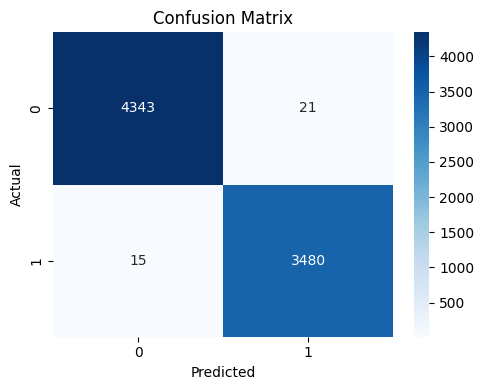

In [ ]:
preds_df = pd.read_csv("/kaggle/input/dataset/best_model_xlnet-base-cased_predictions.csv")
y_test = preds_df["true_label"].tolist()
y_test_pred = preds_df["predicted_label"].tolist()

print("\nTest Performance:")
test_metrics_xlnet = calculate_performance(y_test, y_test_pred, show_plot=True)

#### **XLNet**

**Điểm mạnh:**

- **Hiệu suất rất cao trên tập kiểm tra**: Accuracy đạt **99.54%**, F1-score đạt **0.9949**, cho thấy XLNet gần như phân loại chính xác toàn bộ mẫu tin thật và tin giả.
- **Tiếp thu thông tin tốt từ ngữ cảnh hai chiều (permutation-based)**: Không giống như BERT chỉ nhìn về phía trái, XLNet học được các mối quan hệ giữa từ ở mọi vị trí thông qua hoán vị chuỗi, giúp hiểu ngữ nghĩa sâu sắc hơn trong văn bản dài và phức tạp như tin tức.
- **Tốt cho các tác vụ yêu cầu hiểu ngữ cảnh sâu**: Đặc biệt hiệu quả khi phân biệt các mẫu tin giả có cấu trúc phức tạp hoặc dùng lối viết gần giống tin thật.

**Điểm yếu:**

- **Mô hình phức tạp và nặng hơn**: XLNet có kiến trúc transformer với cơ chế hoán vị ngữ cảnh nên cần nhiều tài nguyên tính toán (thời gian huấn luyện lâu hơn, sử dụng nhiều RAM/VRAM).
- **Thời gian huấn luyện và suy diễn chậm hơn**: Khi triển khai trên hệ thống thực tế hoặc cần huấn luyện lại, chi phí tính toán và thời gian tăng đáng kể so với các mô hình nhẹ hơn như Logistic Regression hay SVM.
- **Cần xử lý dữ liệu đầu vào cẩn thận**: Độ dài văn bản cần cắt gọn hợp lý (max_length=512) và đòi hỏi bộ tokenizer riêng để đảm bảo chất lượng đầu vào phù hợp.

**Kết luận:**
XLNet rất phù hợp cho bài toán phân loại tin thật – giả nhờ khả năng học ngữ cảnh sâu và chính xác cao, đặc biệt với các mẫu dữ liệu dài. Tuy nhiên, chi phí tính toán là điều cần cân nhắc nếu triển khai ở môi trường hạn chế tài nguyên.



Test Performance:
Accuracy: 0.9976
Precision: 0.9986
Recall: 0.996
F1-score: 0.9973

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4364
           1       1.00      1.00      1.00      3495

    accuracy                           1.00      7859
   macro avg       1.00      1.00      1.00      7859
weighted avg       1.00      1.00      1.00      7859



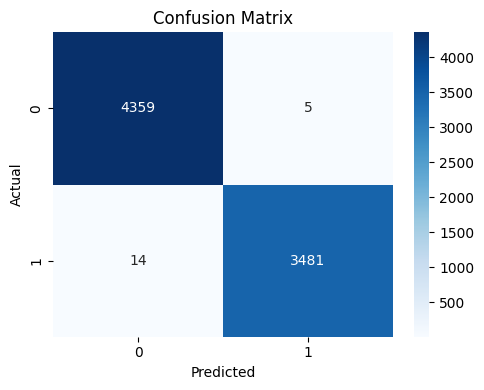

In [ ]:
preds_df = pd.read_csv("/kaggle/input/dataset/best_model_microsoft_deberta-v3-base_predictions.csv")
y_test = preds_df["true_label"].tolist()
y_test_pred = preds_df["predicted_label"].tolist()

print("\nTest Performance:")
test_metrics_deberta = calculate_performance(y_test, y_test_pred, show_plot=True)

#### **DeBERTa**

**Điểm mạnh:**

- **Hiệu suất vượt trội**: Mô hình đạt **Accuracy 99.76%**, **F1-score 0.9973** trên tập kiểm thử – gần như phân loại chính xác toàn bộ tin thật và tin giả. Đây là mô hình có kết quả cao nhất trong tất cả mô hình được thử nghiệm.
- **Kiến trúc DeBERTa cải tiến hơn BERT**:
  - Tách riêng thông tin nội dung (content) và vị trí (position), giúp hiểu ngữ cảnh tốt hơn.
  - Áp dụng cơ chế **relative position encoding**, giúp mô hình học được quan hệ từ tốt hơn trong các văn bản dài như tin tức.
- **Hiệu quả trong việc phát hiện thông tin tinh vi**: Đặc biệt hữu ích với các tin giả được viết khéo léo, sử dụng cấu trúc và ngữ điệu giống tin thật.

**Điểm yếu:**

- **Kích thước mô hình lớn**: Do có nhiều tham số và kiến trúc phức tạp hơn so với BERT, XLNet, việc huấn luyện hoặc triển khai đòi hỏi máy cấu hình mạnh (GPU khuyến khích).
- **Tốn thời gian huấn luyện hơn**: Dù độ chính xác cao, nhưng cần thời gian training và fine-tuning lâu hơn đáng kể nếu không dùng GPU.
- **Cần tiền xử lý tốt**: Như các mô hình transformer khác, cần tokenizer chuyên biệt và phải giới hạn chiều dài văn bản đầu vào (thường là 512 tokens).

**Kết luận:**
DeBERTa là lựa chọn hàng đầu cho bài toán phân loại tin giả, đặc biệt khi bạn có đủ tài nguyên để huấn luyện hoặc triển khai mô hình lớn. Khả năng hiểu ngữ cảnh sâu và hiệu suất vượt trội giúp mô hình này trở thành tiêu chuẩn cao trong các hệ thống kiểm tra độ thật giả của văn bản tin tức.


# Conclusion

In [ ]:
import pandas as pd

# Set consistent metadata
for metrics, name in [
    (test_metrics_nb, 'NaiveBayes'),
    (test_metric_LR, 'LogisticRegression'),
    (test_metrics_lstm, 'LSTM'),
    (test_metrics, 'BERT'),
    (test_metrics_svm, 'SVM'),
    (test_metrics_xlnet, 'XLNet'),
    (test_metrics_deberta, 'DeBERTa')
]:
    metrics['dataset'] = 'test'
    metrics['model'] = name

# Create the final DataFrame
results_test_df = pd.DataFrame([
    test_metrics_nb,
    test_metric_LR,
    test_metrics_lstm,
    test_metrics,
    test_metrics_svm,
    test_metrics_xlnet,
    test_metrics_deberta
])

results_test_df

,accuracy,precision,recall,f1_score,dataset,model
0,0.8872,0.9028,0.8666,0.8843,test,NaiveBayes
1,0.9479,0.9470,0.9485,0.9477,test,LogisticRegression
2,0.9447,0.9372,0.9524,0.9447,test,LSTM
3,0.9910,0.9935,0.9883,0.9909,test,BERT
4,0.9177,0.9153,0.9196,0.9175,test,SVM
5,0.9954,0.9940,0.9957,0.9949,test,XLNet
6,0.9976,0.9986,0.9960,0.9973,test,DeBERTa


**Nhận xét:**

- Nếu mục tiêu chính là **rút ngắn thời gian huấn luyện và tiết kiệm tài nguyên tính toán**, thì mô hình **Naive Bayes** là một lựa chọn phù hợp. Với thời gian train nhanh nhất trong tất cả các mô hình và yêu cầu cấu hình phần cứng thấp, Naive Bayes đặc biệt hiệu quả trong các hệ thống hạn chế về tài nguyên hoặc cần triển khai nhanh.
- Nếu mục tiêu chính là đạt được **tính giải thích cao**, kết quả huấn luyện **khá ổn định**, đồng thời thời gian huấn luyện **tương đối nhanh**, thì mô hình **Logistic Regression** là một lựa chọn hợp lý.
- Nếu mục tiêu chính là đạt được **độ chính xác dự đoán cao nhất**, và **không bị giới hạn bởi tài nguyên tính toán**, thì các mô hình **Transformer hiện đại** là lựa chọn tối ưu. Những mô hình này có khả năng hiểu sâu ngữ cảnh và mối quan hệ giữa các từ, nhờ đó thường mang lại hiệu suất vượt trội trong phát hiện tin giả.


**Điểm yếu và gợi ý cải thiện**

**Naive Bayes**

Điểm yếu


- Do mô hình Naive Bayes giả định tính độc lập giữa các đặc trưng , điều này không phản ánh đúng đặc trưng trong ngôn ngữ dẫn đến **hiệu suất thấp nhất** trong các model.

- Phải vector hóa dựa trên ma trận TF-IDF nên bị phụ thuộc nặng vào vocabulary của tập train. Nếu có từ mới, ngôn ngữ khác thì không thể tính toán tốt, sẽ bị bỏ qua hoặc gán trọng số 0, gây mất thông tin.

- Naive Bayes vượt trội ở tốc độ train và inference nhưng chắc chắn phải đánh đổi lại tính chính xác không bằng các phương pháp khác.

Cách cải thiện

- Kết hợp Naive Bayes với các feature bổ sung như bigram/trigram để giảm giả định độc lập hoàn toàn. Tuy giảm tính độc lập giả định, nhưng làm tăng chiều dữ liệu, phải đánh đổi tốc độ
- Dùng kỹ thuật ensemble như VotingClassifier để kết hợp Naive Bayes với các mô
hình khác.
- Tuy có thể train Naive Bayes với ma trận TF-IDF khi có từ mới, ngôn ngữ mới hoặc kết hợp với các model khác để tăng tính chính xác, nhưng đó lại làm mất đi điểm mạnh là tốc độ của Naive Bayers. Đồng thời, mỗi lần có dữ liệu mới thì lại phải train từ đầu, không linh hoạt. Ta nên cân nhắc đổi qua mô hình khác khi bài toán trở nên phức tạp hơn.

**Logistic Regression**

Điểm yếu


- Chỉ có thể học được các mối quan hệ tuyến tính, không học được các quan hệ phi tuyến phức tạp.

- Dù có thể học quan hệ phi tuyến gián tiếp qua biến đổi đặc trưng (polynomial), khả năng vẫn kém hơn mô hình non-linear (NN, SVM kernel).

- Phải vector hóa dựa trên ma trận TF-IDF nên bị phụ thuộc nặng vào vocabulary của tập train. Nếu có từ mới, ngôn ngữ khác thì không thể tính toán được.


Cách cải thiện

- Bổ sung **polynomial features** nhưng cần cẩn thận với overfitting do chiều dữ liệu tăng. Nên kết hợp regularization mạnh (L1/L2).
- Kết hợp với các **đặc trưng ngữ nghĩa** như sentiment score, entity recognition. Tuy nhiên, Các đặc trưng này cần được trích xuất từ công cụ bên ngoài (spaCy, Sentiment Analyzer...) sẽ tăng độ phức tạp hệ thống.
- Dùng embedding thay vì TF-IDF để giảm chiều dữ liệu và xử lý từ mới tốt hơn.
- Tuy có thể train Logistic Regression với ma trận TF-IDF khi có từ mới, ngôn ngữ mới hoặc kết hợp với các đặc trưng ngữ nghĩa hoặc polynomial feature để tăng tính chính xác, nhưng nếu vocab quá lớn, số lượng biến của mô hình tăng theo cấp số nhân, dẫn tới quá nặng và hiệu quả chưa chắc bằng với việc sử dụng các mô hình khác. Vì vậy, ta nên cân nhắc đổi qua mô hình khác khi bài toán trở nên phức tạp hơn.

**SVM**

Điểm yếu

- LinearSVM chỉ phù hợp khi dữ liệu có thể phân tách tuyến tính tốt.
- Không tự động trích xuất đặc trưng như các mô hình deep learning nên phụ thuộc hoàn toàn vào chất lượng biểu diễn đầu vào (TF-IDF).
- Không hỗ trợ "early stopping" trong huấn luyện vì không phải là mô hình huấn luyện theo epoch như neural networks.
- Hiệu suất có thể kém hơn trên các văn bản ngắn, nhiễu hoặc có thông tin ngữ cảnh sâu mà TF-IDF không thể nắm bắt.

Cách cải thiện

- Sử dụng các kernel phi tuyến như RBF hoặc polynomial để mô hình hóa các quan hệ phức tạp hơn.
- Kết hợp TF-IDF với đặc trưng bổ sung như n-gram, topic modeling , sentiment scores để bổ sung thông tin ngữ nghĩa.
- Thử nghiệm với các cách giảm chiều dữ liệu khác như PCA, cũng như tăng lượng thông tin giữ lại để model có thể nắm bắt tốt hơn.


**LSTM**

Điểm yếu


- Tính diễn giải thấp.
- Thời gian train vẫn cao hơn mô hình truyền thống.
- Không hoạt động tốt với những văn bản quá dài (LSTM vẫn bị vanishing gradient với chuỗi rất dài (>100 tokens)) vì kiến trúc của LSTM cũng chỉ cải thiện hơn việc "nhớ" ngắn hạn của RNN truyền thống chứ không trực tiếp tính toán bằng thông tin của mọi vị trí như các mô hình Transformer-based với Attention.

Cách cải thiện

- Sử dụng **pretrained Word2Vec từ corpus lớn hơn** (như Google News) hoặc thử nghiệm **fastText** để biểu diễn từ hiệu quả hơn.
- Bổ sung **attention layer** để mô hình tập trung vào các từ quan trọng trong câu.
- Có thể dùng hierarchical LSTM cho văn bản dài (chia thành đoạn nhỏ)
- Với bài toán phức tạp, nên chuyển sang Transformer-based models (hiệu quả hơn với ngữ cảnh dài)

**DistilBERT**

Điểm yếu


- Dù nhẹ hơn BERT đầy đủ, DistilBERT vẫn rất lớn (66M param) và mất nhiều thời gian huấn luyện và dự đoán kết quả. DistilBERT vẫn cần GPU để inference nhanh trong production.
- Tính diễn giải của mô hình thấp.

Cách cải thiện

- Tối ưu inference bằng cách chuyển mô hình sang **ONNX** hoặc áp dụng **quantization** (nhưng giảm độ chính xác (float32 → float16/int8) → giảm 50-75% bộ nhớ).
- Dùng **LIME, SHAP hoặc explain_transformers** để giải thích quyết định mô hình.
- Thử nghiệm với Bert bé hơn như **Tiny Bert** để giảm thời gian huấn luyện, tuy nhiên điều này cũng có thể đành đổi rằng kết quả đầu ra của mô hình có thể giảm.
- Chỉ fine-tune lớp top layers để tiết kiệm thời gian.


**XLNET**

Điểm yếu

- **Mô hình phức tạp và nặng hơn**: XLNet có kiến trúc transformer với cơ chế hoán vị ngữ cảnh nên cần nhiều tài nguyên tính toán (thời gian huấn luyện lâu hơn, sử dụng nhiều RAM/VRAM).
- **Thời gian huấn luyện và suy diễn chậm hơn**: Khi triển khai trên hệ thống thực tế hoặc cần huấn luyện lại, chi phí tính toán và thời gian tăng đáng kể so với các mô hình nhẹ hơn như Logistic Regression hay SVM.
- **Cần xử lý dữ liệu đầu vào cẩn thận**: Độ dài văn bản cần cắt gọn hợp lý (max_length=512) và đòi hỏi bộ tokenizer riêng để đảm bảo chất lượng đầu vào phù hợp.
- Tính diễn giải của mô hình thấp.

Cách cải thiện
- Để giảm chi phí huấn luyện ta có thể không fine-tune toàn bộ mô hình XLNET, mỗi văn bản đầu vào ta chuyển thành 1 vector (embedding) thông qua XLNet, sau đó huấn luyện bằng các mô hình nhẹ hơn (LR, SVM, LSTM), tuy nhiên điều này có thể đánh đổi rằng hiệu suất mô hình có thể sẽ thấp hơn đáng kể không còn chính xác như ban đầu.
- Tối ưu inference bằng cách chuyển mô hình sang **ONNX** hoặc áp dụng **quantization** (nhưng giảm độ chính xác (float32 → float16/int8) → giảm 50-75% bộ nhớ).
- Dùng **LIME, SHAP hoặc explain_transformers** để giải thích quyết định mô hình.

**DeBERTa**

Điểm yếu

- **Kích thước mô hình lớn**: Do có nhiều tham số và kiến trúc phức tạp hơn so với BERT, XLNet, việc huấn luyện hoặc triển khai đòi hỏi máy cấu hình mạnh (GPU khuyến khích).
- **Tốn thời gian huấn luyện hơn**: Dù độ chính xác cao, nhưng cần thời gian training và fine-tuning lâu hơn đáng kể nếu không dùng GPU.
- **Cần tiền xử lý tốt**: Như các mô hình transformer khác, cần tokenizer chuyên biệt và phải giới hạn chiều dài văn bản đầu vào (thường là 512 tokens).
- Tính diễn giải của mô hình thấp.

Cách cải thiện
- Tối ưu inference bằng cách chuyển mô hình sang **ONNX** hoặc áp dụng **quantization** (nhưng giảm độ chính xác (float32 → float16/int8) → giảm 50-75% bộ nhớ).
- Dùng **LIME, SHAP hoặc explain_transformers** để giải thích quyết định mô hình.
- Cũng như XLNET, ta có thể không fine-tune toàn bộ mô hình, mà embedding vector thông qua DeBERTa, rồi huấn luyện mô hình nhẹ hơn (LR, LSTM, SVM), tuy nhiên điều đánh có thể đánh đổi rằng hiệu suất mô hình không còn như ban đầu.



Tuy nhiên như đã nói ở trên, tuỳ vào mục đích tối ưu cuối cùng khi deploy ở thực tế mà ta sẽ sử dụng các mô hình khác nhau, cũng như cách cải thiện theo từng mô hình khác nhau.

# Predict

In [ ]:
def data_processing(text):
    ### Thay thế URL/HTML
    text = re.sub(r'(https?:\/\/|www\.)[\w\-\.]+\.[a-z]{2,}(\/\S*)?', '[URL]', text, flags=re.IGNORECASE)
    text = re.sub(r'<[^>]+>', '[HTML]', text)

    ### Xóa khoảng trắng thừa, newline và chữ số
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d', '', text)
    return text

class NewsPredictor:
    def __init__(self, model_path, model_name="microsoft/deberta-v3-base", num_labels=2):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.tokenizer = TokenizerWrapper(model_name)
        self.model = ModelBuilder(model_name=model_name, num_labels=num_labels).get_model()
        self.model.load_state_dict(torch.load(model_path, map_location=self.device))
        self.model.to(self.device)
        self.model.eval()
        self.inferencer = Inferencer(self.model, self.tokenizer.tokenizer, self.device)

    @staticmethod
    def output_label(label):
        return "Fake News!" if label == 0 else "True News!"

    def predict(self, text: str):
        processed_text = data_processing(text)  # make sure you have this function defined

        pred = self.inferencer.predict(processed_text)
        return f"Input: {text}\nProcessed Text: {processed_text}\nOutput: {self.output_label(pred[0])}"


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Trained_Models/best_model_microsoft_deberta-v3-base.pt'
predictor = NewsPredictor(model_path=file_path)

# Dự đoán
new_text = "On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search warrant are on the Internet. I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me,  the former sheriff tweeted.  I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked by better people than them #MAGA I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me. I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked by better people than them #MAGA pic.twitter.com/XtZW5PdU2b  David A. Clarke, Jr. (@SheriffClarke) December 30, 2017He didn t stop there.BREAKING NEWS! When LYING LIB MEDIA makes up FAKE NEWS to smear me, the ANTIDOTE is go right at them. Punch them in the nose & MAKE THEM TASTE THEIR OWN BLOOD. Nothing gets a bully like LYING LIB MEDIA S attention better than to give them a taste of their own blood #neverbackdown pic.twitter.com/T2NY2psHCR  David A. Clarke, Jr. (@SheriffClarke) December 30, 2017The internet called him out.This is your local newspaper and that search warrant isn t fake, and just because the chose not to file charges at the time doesn t mean they won t! Especially if you continue to lie. Months after decision not to charge Clarke, email search warrant filed https://t.co/zcbyc4Wp5b  KeithLeBlanc (@KeithLeBlanc63) December 30, 2017I just hope the rest of the Village People aren t implicated.  Kirk Ketchum (@kirkketchum) December 30, 2017Slaw, baked potatoes, or French fries? pic.twitter.com/fWfXsZupxy  ALT- Immigration   (@ALT_uscis) December 30, 2017pic.twitter.com/ymsOBLjfxU  Pendulum Swinger (@PendulumSwngr) December 30, 2017you called your police friends to stand up for you when someone made fun of your hat  Chris Jackson (@ChrisCJackson) December 30, 2017Is it me, with this masterful pshop of your hat, which I seem to never tire of. I think it s the steely resolve in your one visible eye pic.twitter.com/dWr5k8ZEZV  Chris Mohney (@chrismohney) December 30, 2017Are you indicating with your fingers how many people died in your jail? I think you re a few fingers short, dipshit  Ike Barinholtz (@ikebarinholtz) December 30, 2017ROFL. Internet tough guy with fake flair. pic.twitter.com/ulCFddhkdy  KellMeCrazy (@Kel_MoonFace) December 30, 2017You re so edgy, buddy.  Mrs. SMH (@MRSSMH2) December 30, 2017Is his break over at Applebees?  Aaron (@feltrrr2) December 30, 2017Are you trying to earn your  still relevant  badge?  CircusRebel (@CircusDrew) December 30, 2017make sure to hydrate, drink lots of water. It s rumored that prisoners can be denied water by prison officials.  Robert Klinc (@RobertKlinc1) December 30, 2017Terrill Thomas, the 38-year-old black man who died of thirst in Clarke s Milwaukee County Jail cell this April, was a victim of homicide. We just thought we should point that out. It can t be repeated enough.Photo by Spencer Platt/Getty Images."
real_label = "Fake"  # Thêm label thực tế
result = predictor.predict(new_text)
print(result)

Loading custom model for: microsoft/deberta-v3-base
Input: On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search warrant are on the Internet. I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me,  the former sheriff tweeted.  I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked by better people than them #MAGA I am

In [ ]:
print("Label:", real_label)

Label: Fake
